In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

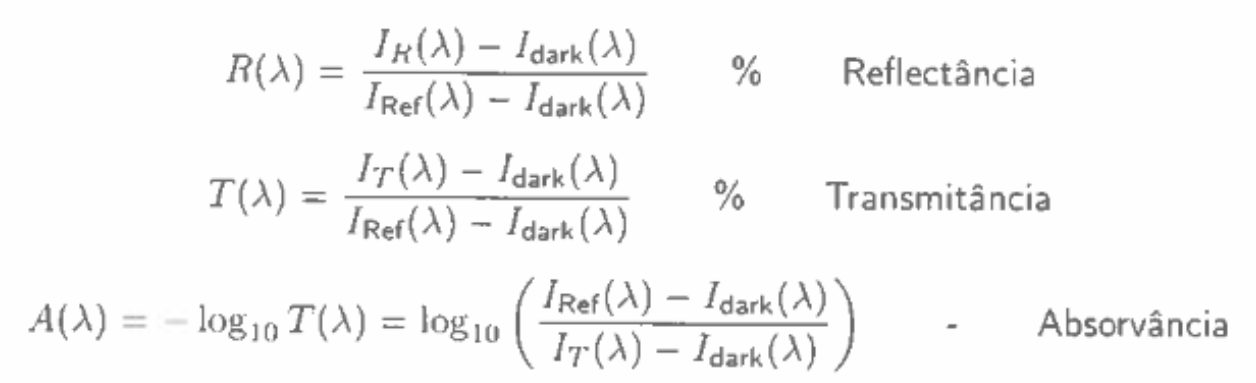

In [3]:
excel = pd.read_excel('filtros-code-ready.xlsx').to_numpy().T
xx = excel[0]
verdeT = excel[1]
verdeR = excel[2]
rosaT = excel[3]
rosaR = excel[4]
amareloT = excel[5]
amareloR = excel[6]
laranjaT = excel[7]
laranjaR = excel[8]
darkT = excel[9]
darkR = excel[10]
verdeTP = excel[11]
verdeRP = excel[12]
laranjaTP = excel[13]
laranjaRP = excel[14]
refTP0 = excel[15]
refRP0 = excel[16]

In [4]:
## RESTRINGIR DO ind=610 - ind=1050
print(xx[610])
print(xx[1050])

446.041
630.404


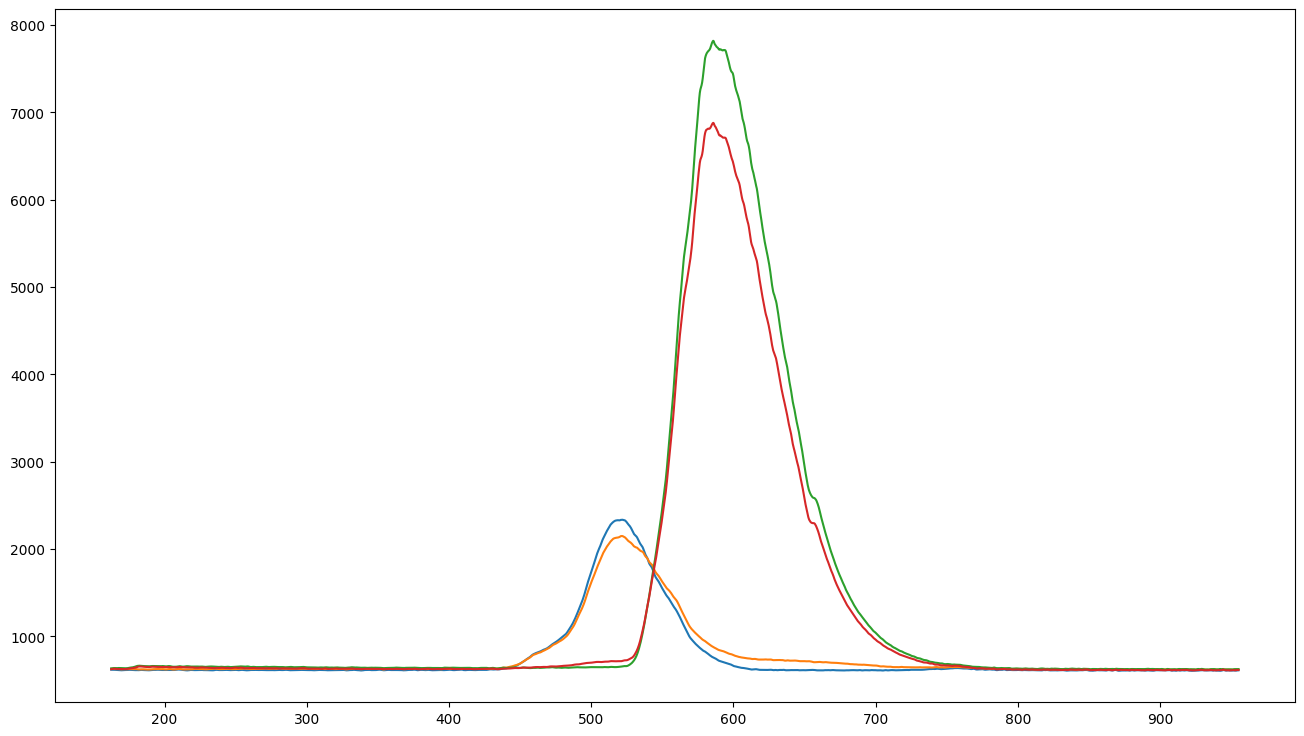

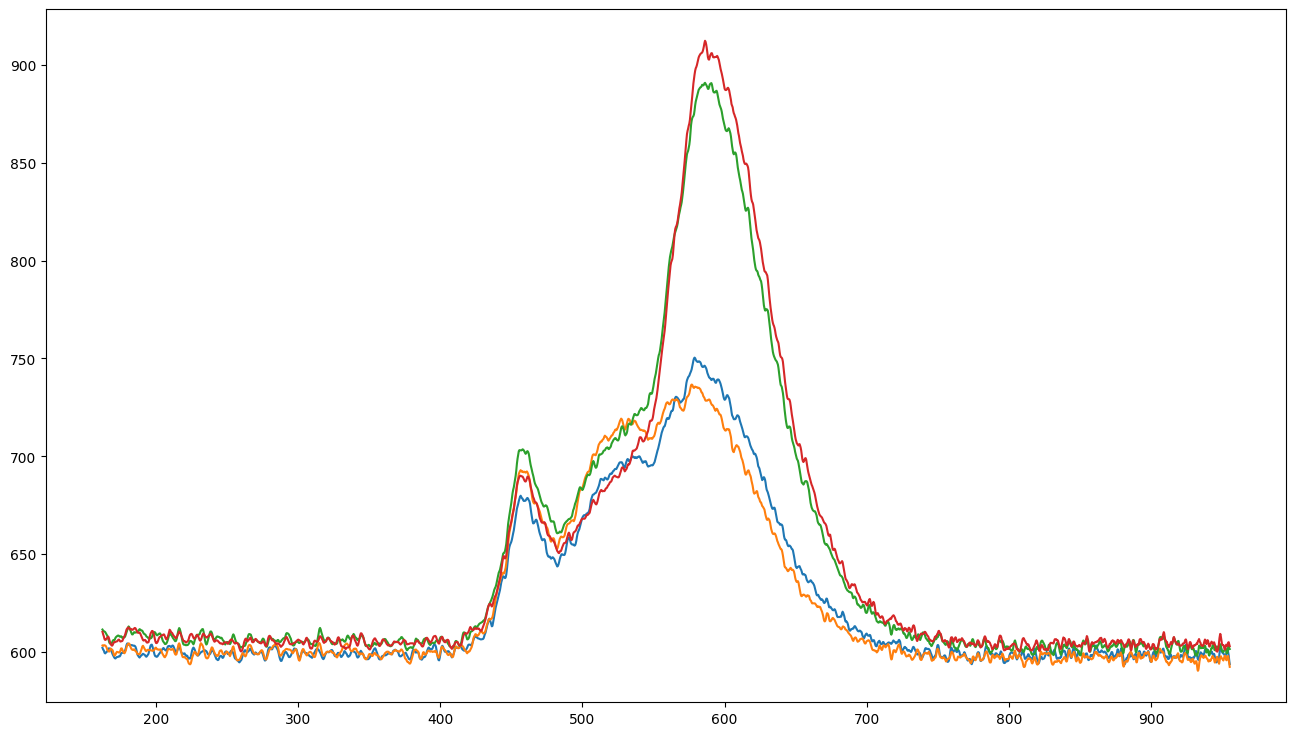

In [5]:
## PIPI vs Nós:

plt.figure(figsize=(16,9))
# plt.plot(xx,verdeT)
# plt.plot(xx,verdeTP)
# plt.plot(xx,laranjaT)
# plt.plot(xx,laranjaTP)


relVT = verdeT/verdeTP
relLT = laranjaT/laranjaTP
# relT = 0.5*(np.max(relVT) + np.max(relLT))
relT = 0.5*(relVT + relLT)

plt.plot(xx,verdeT)
plt.plot(xx,verdeTP*relT)
plt.plot(xx,laranjaT)
plt.plot(xx,laranjaTP*relT)
plt.show()

relVR = verdeR/verdeRP
relLR = laranjaR/laranjaRP
# relR = 0.5*(np.max(relVR) + np.max(relLR))
relR = 0.5*(relVR + relLR)

plt.figure(figsize=(16,9))
plt.plot(xx,verdeR)
plt.plot(xx,verdeRP*relR)
plt.plot(xx,laranjaR)
plt.plot(xx,laranjaRP*relR)



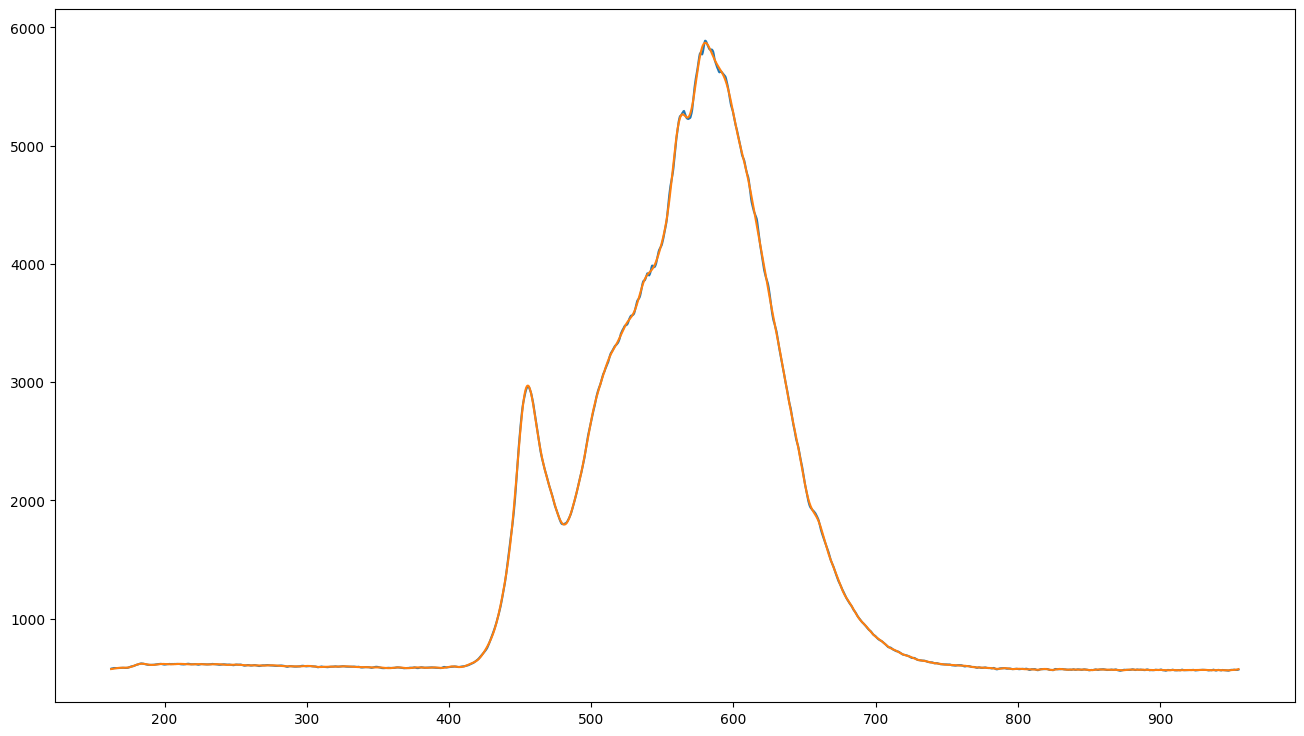

In [6]:
# REF-T
refTP =  refTP0*relT
plt.figure(figsize=(16,9))
plt.plot(xx,refTP)

ck = np.fft.rfft(refTP)
ck[75:] *= 0
refTP2 = np.fft.irfft(ck)
plt.plot(xx,refTP2)

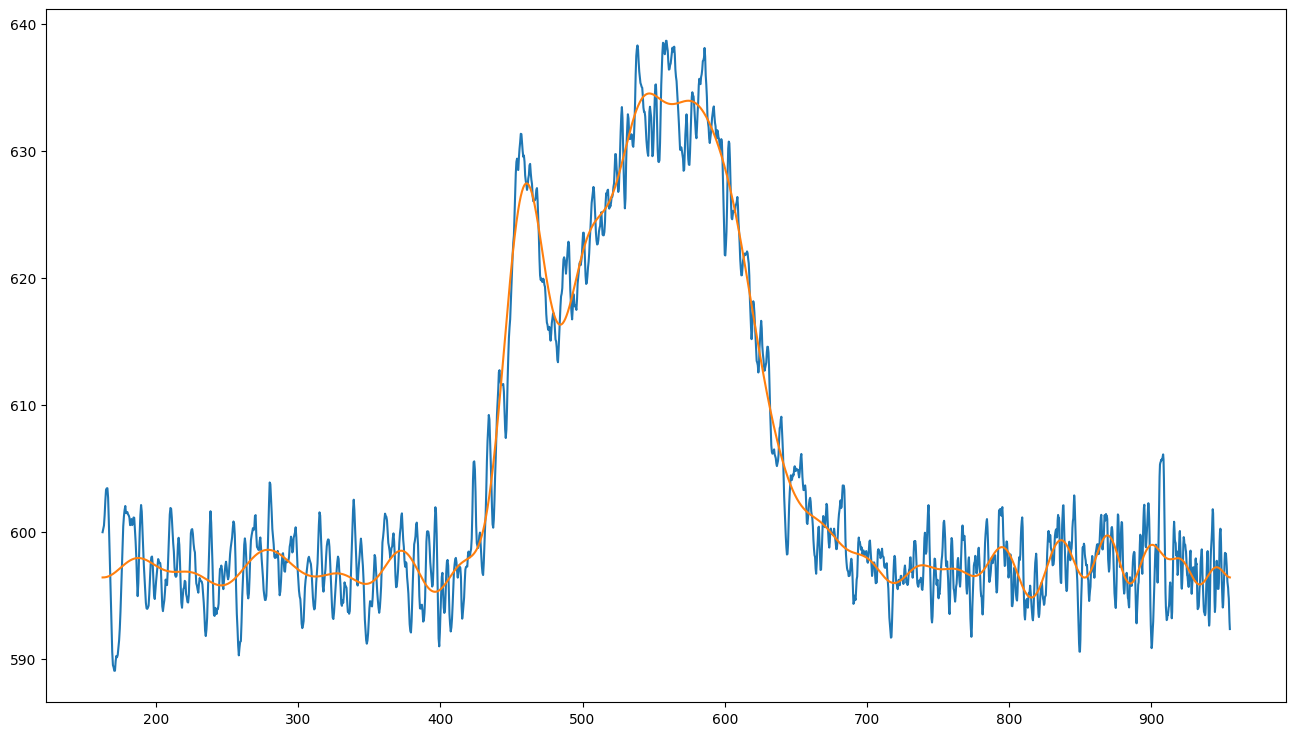

In [7]:
# REF-R
refRP =  refRP0*relR
plt.figure(figsize=(16,9))
plt.plot(xx,refRP)

ck = np.fft.rfft(refRP)
ck[25:] *= 0
refRP2 = np.fft.irfft(ck)
plt.plot(xx,refRP2)

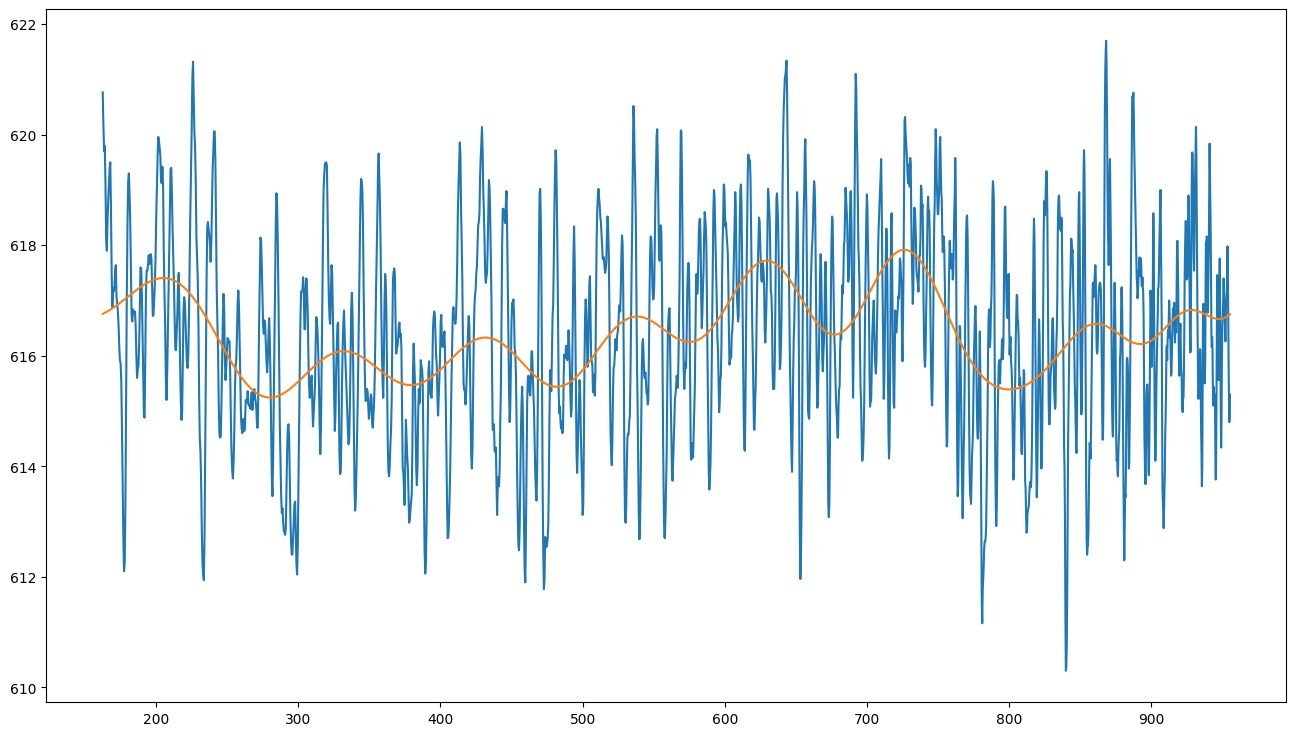

In [8]:
# DARK-T
plt.figure(figsize=(16,9))
plt.plot(xx,darkT)

ck = np.fft.rfft(darkT)
ck[10:] *= 0
darkT2 = np.fft.irfft(ck)
plt.plot(xx,darkT2)

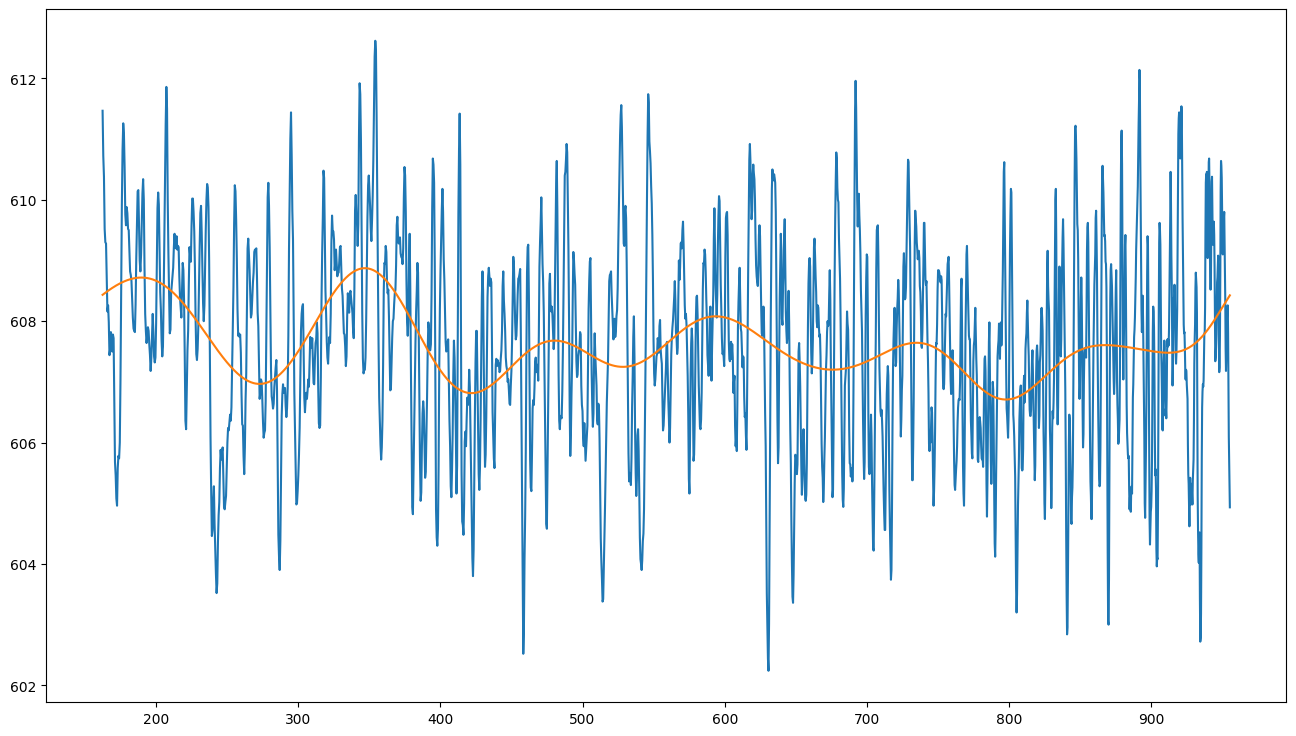

In [9]:
# DARK-R
plt.figure(figsize=(16,9))
plt.plot(xx,darkR)

ck = np.fft.rfft(darkR)
ck[10:] *= 0
darkR2 = np.fft.irfft(ck)
plt.plot(xx,darkR2)

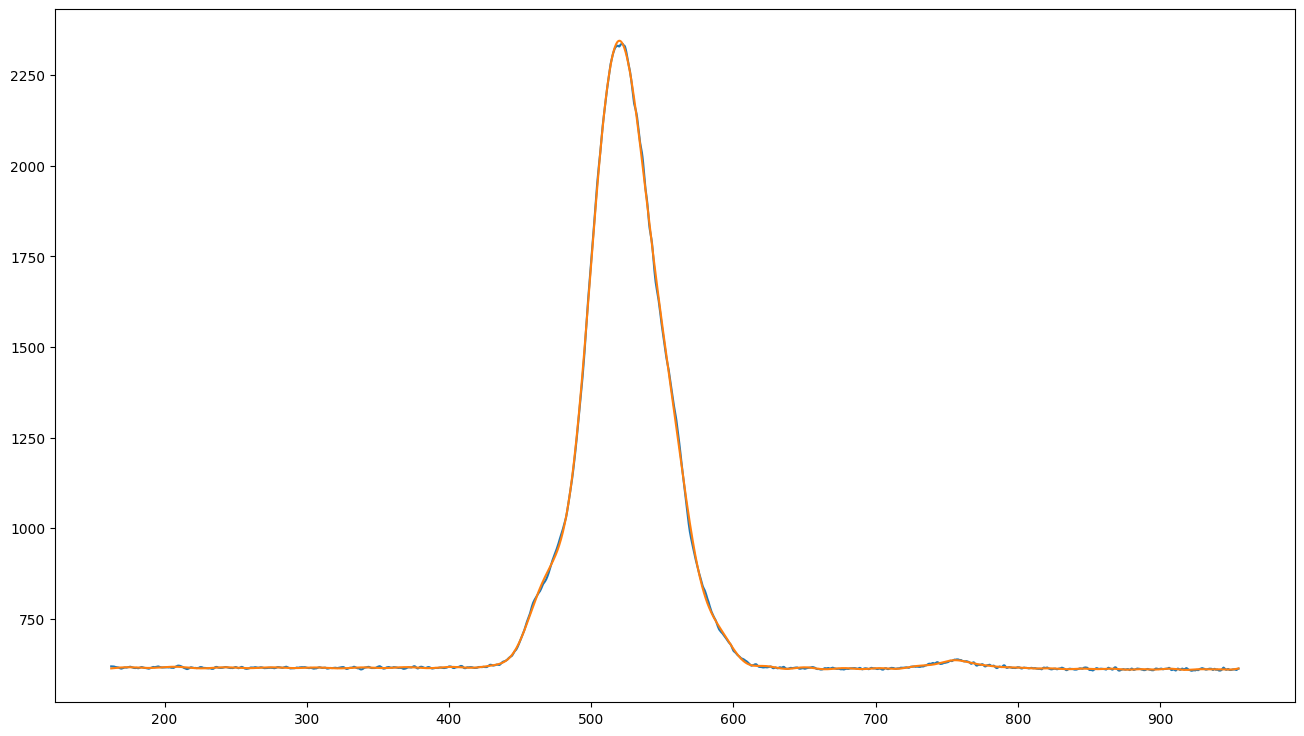

[745.453 199.188 198.707]


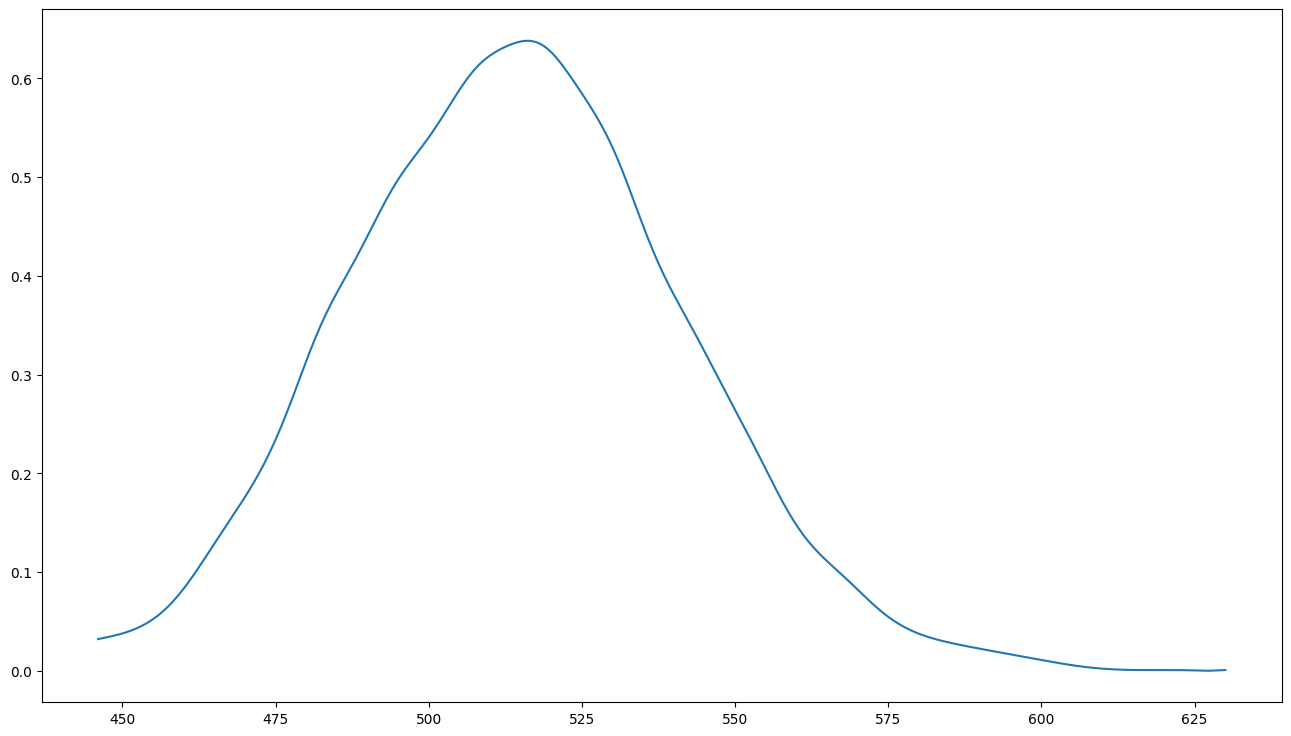

In [10]:
# VERDE-T
plt.figure(figsize=(16,9))
plt.plot(xx,verdeT)

ck = np.fft.rfft(verdeT)
ck[30:] *= 0
verdeT2 = np.fft.irfft(ck)
plt.plot(xx,verdeT2)

plt.show()
plt.figure(figsize=(16,9))
TTverde = (verdeT2-darkT2)/(refTP2-darkT2)
plt.plot(xx[610:1050], np.abs(TTverde[610:1050]))
print(xx[np.argpartition(TTverde, -3)[-3:]])

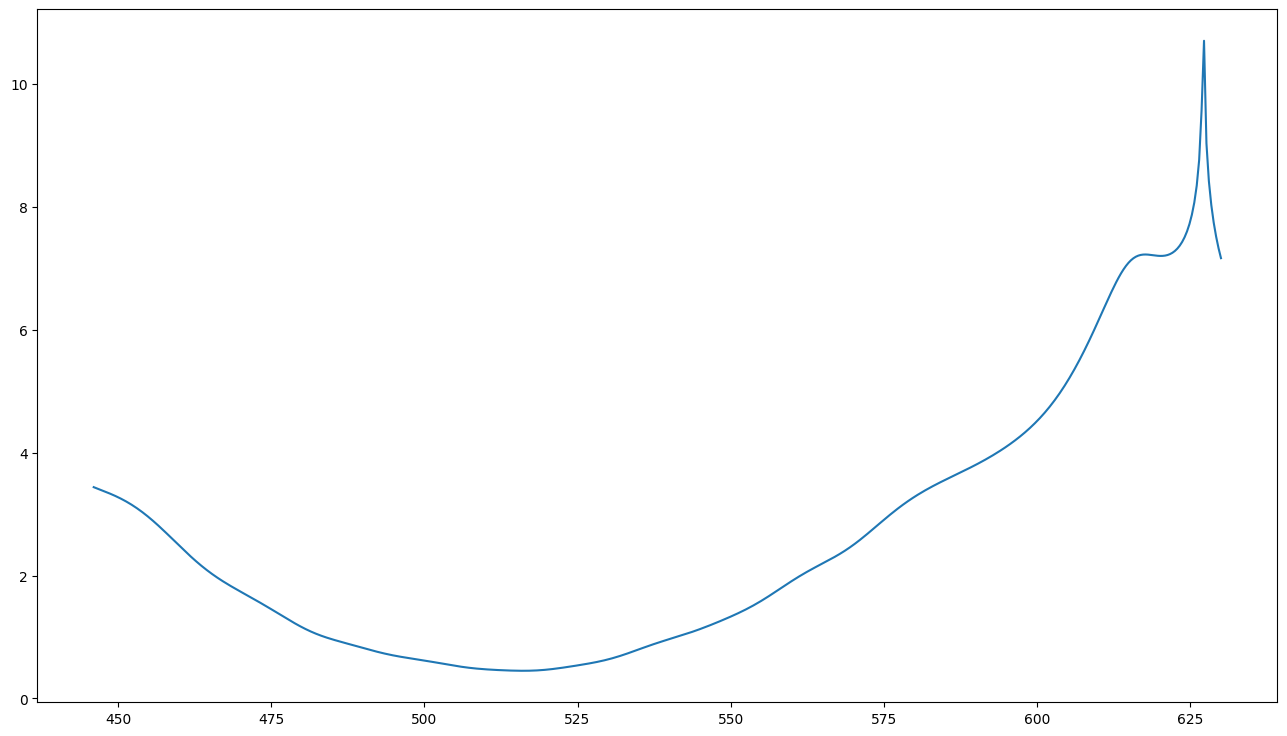

In [11]:
# VERDE-A
AAverde = np.log(1/np.abs(TTverde))
plt.figure(figsize=(16,9))
plt.plot(xx[610:1050],np.abs(AAverde)[610:1050])


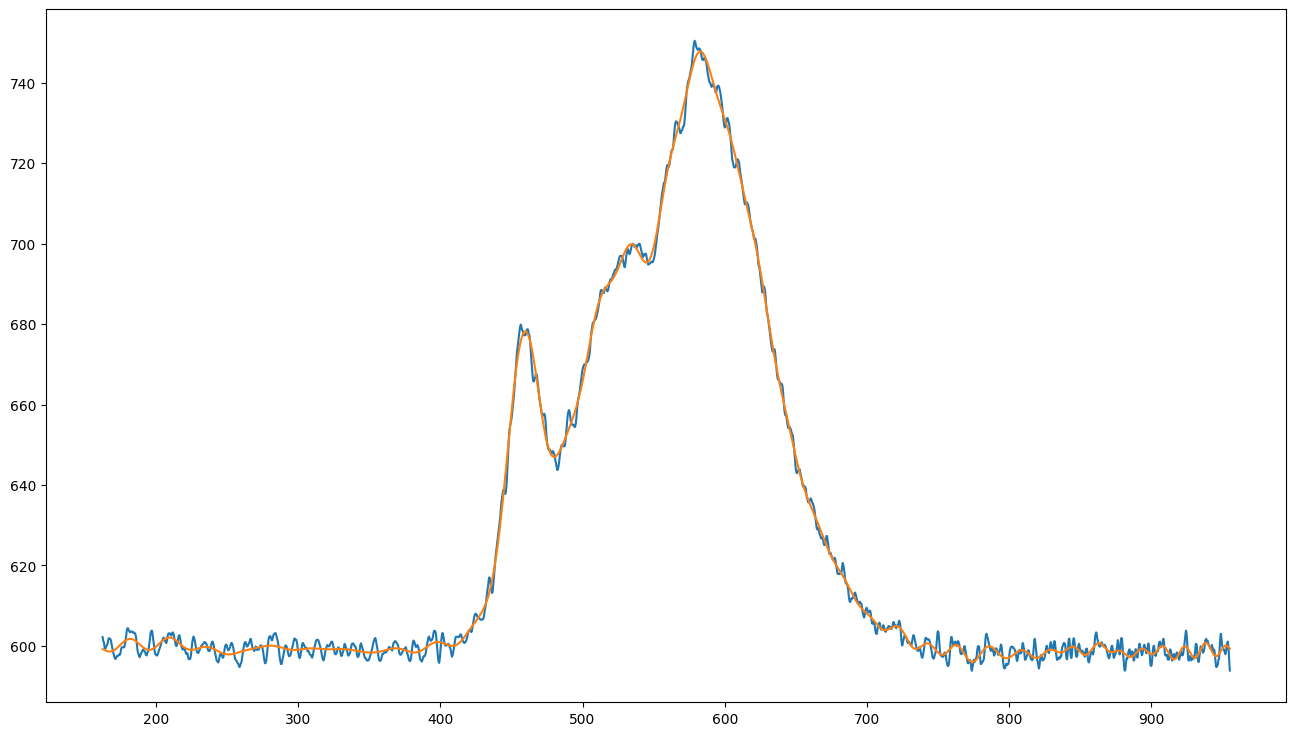

[438.974 634.743 635.136 635.53  635.923]


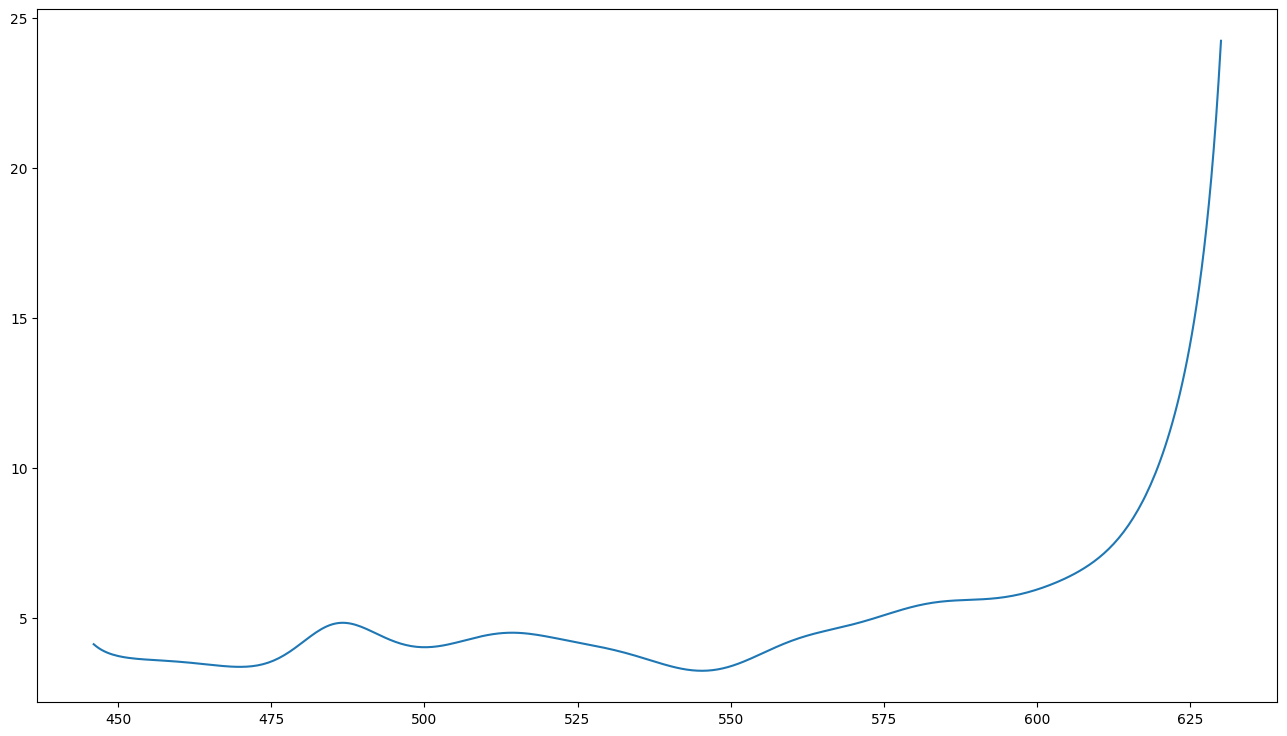

In [12]:
# VERDE-R
plt.figure(figsize=(16,9))
plt.plot(xx,verdeR)

ck = np.fft.rfft(verdeR)
ck[40:] *= 0
verdeR2 = np.fft.irfft(ck)
plt.plot(xx,verdeR2)

plt.show()
plt.figure(figsize=(16,9))
RRverde = (verdeR2-darkR2)/(refRP2-darkR2)
plt.plot(xx[610:1050], np.abs(RRverde)[610:1050])
print(xx[np.argpartition(RRverde, -5)[-5:]])


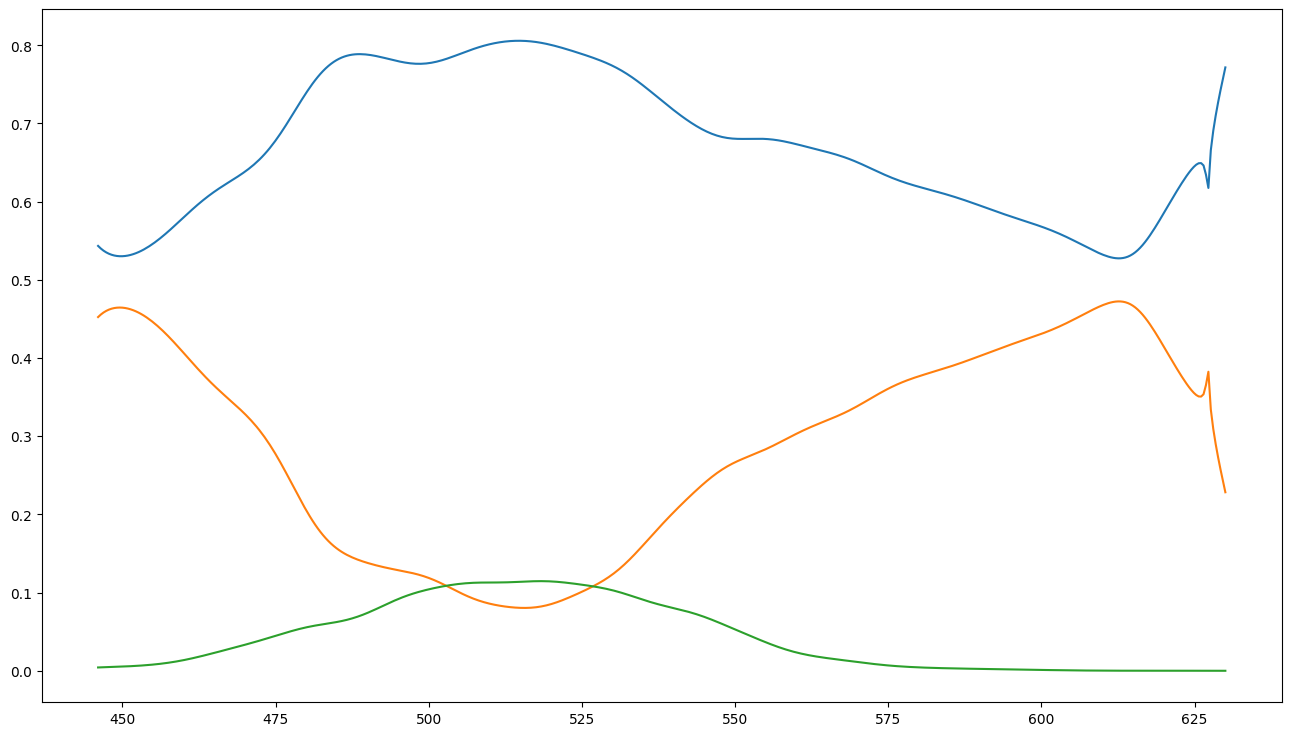

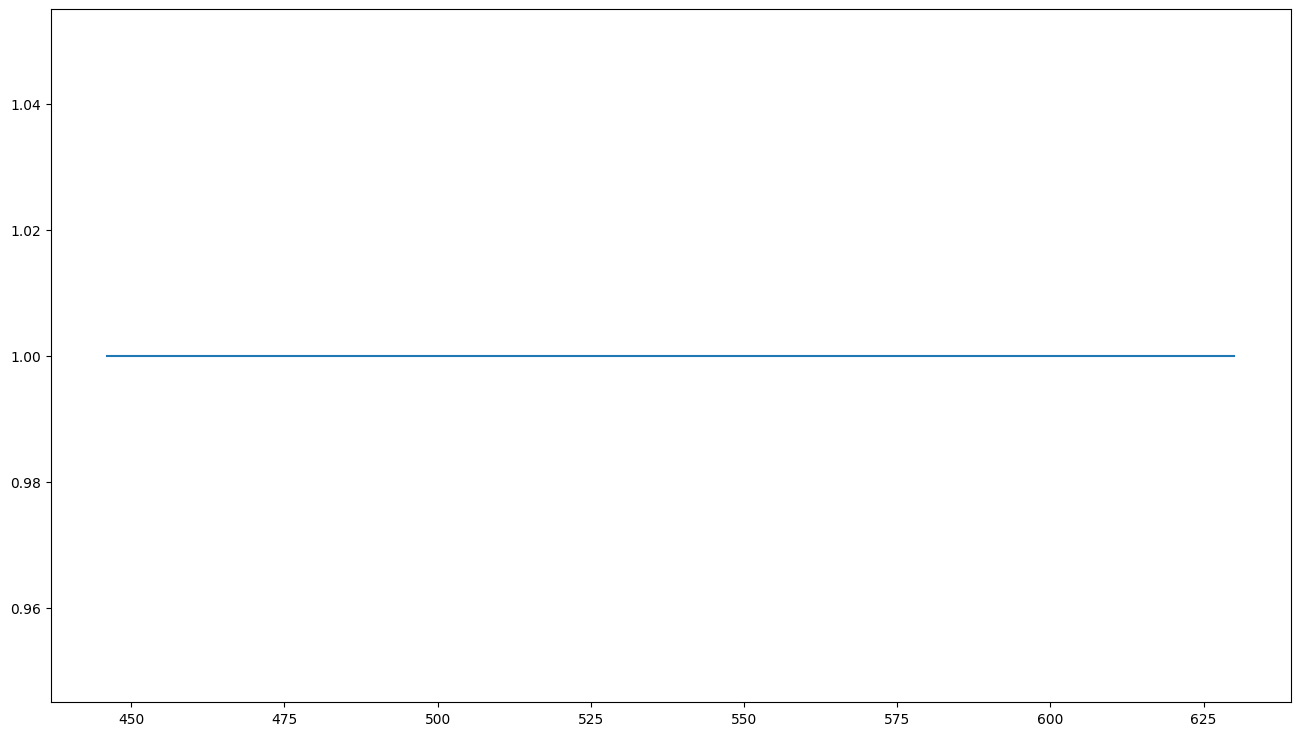

In [13]:
### VERDE FINAL

## Normalizar

TOTverde = RRverde + AAverde + TTverde
RRverde = RRverde/TOTverde
AAverde = AAverde/TOTverde
TTverde = TTverde/TOTverde

## Sobreposição

plt.figure(figsize=(16,9))
plt.plot(xx[610:1050], RRverde[610:1050])
plt.plot(xx[610:1050], AAverde[610:1050])
plt.plot(xx[610:1050], TTverde[610:1050])

plt.figure(figsize=(16,9))
plt.plot(xx[610:1050], (RRverde + AAverde + TTverde)[610:1050])

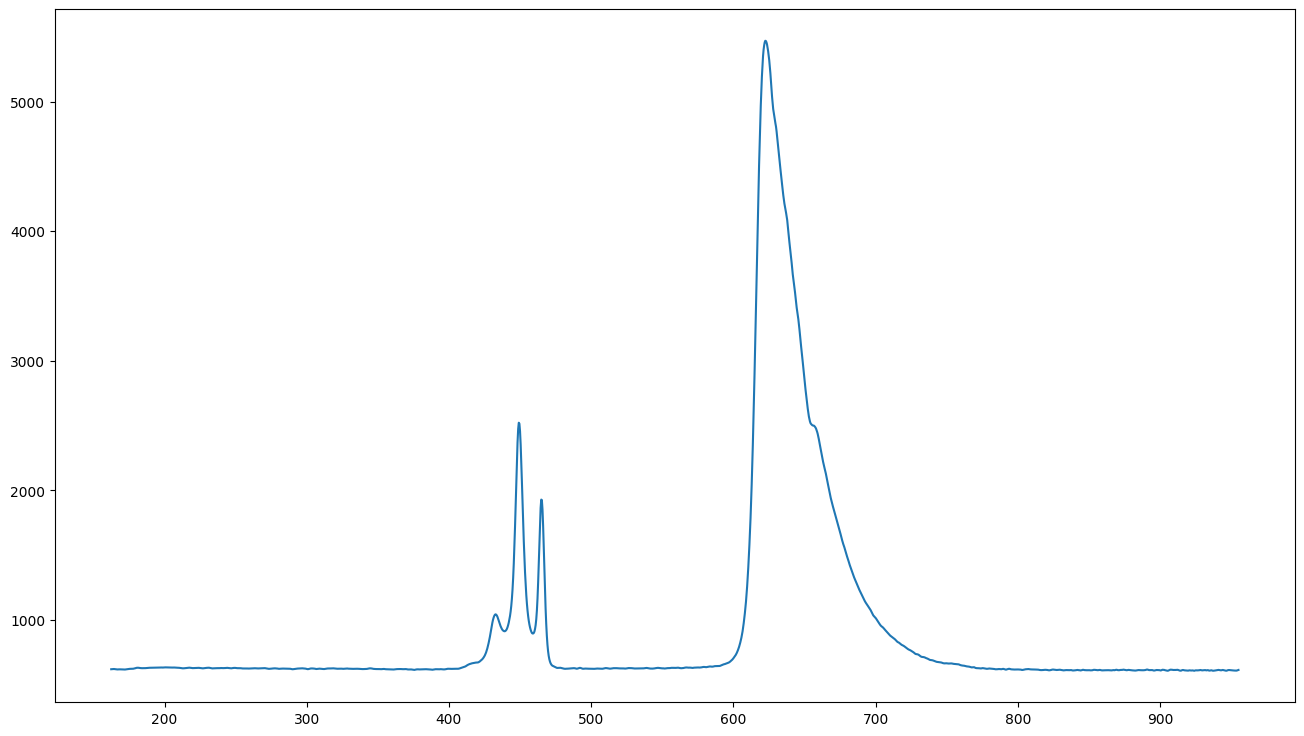

[465.793 464.919 446.482 465.356 616.108 450.887 616.507 446.923 616.906
 450.447 447.364 447.804 448.245 448.685 449.126 449.566 450.006 617.305
 617.704 618.102 618.501 618.899 619.298 619.696 620.094 620.492 620.89
 621.288 621.686 622.083 622.48  622.878 623.275 623.672 624.069 624.466
 624.863 625.259 625.656 626.052 626.448 626.844 627.241 627.636 628.032
 628.428 628.823 629.219 629.614 630.009]


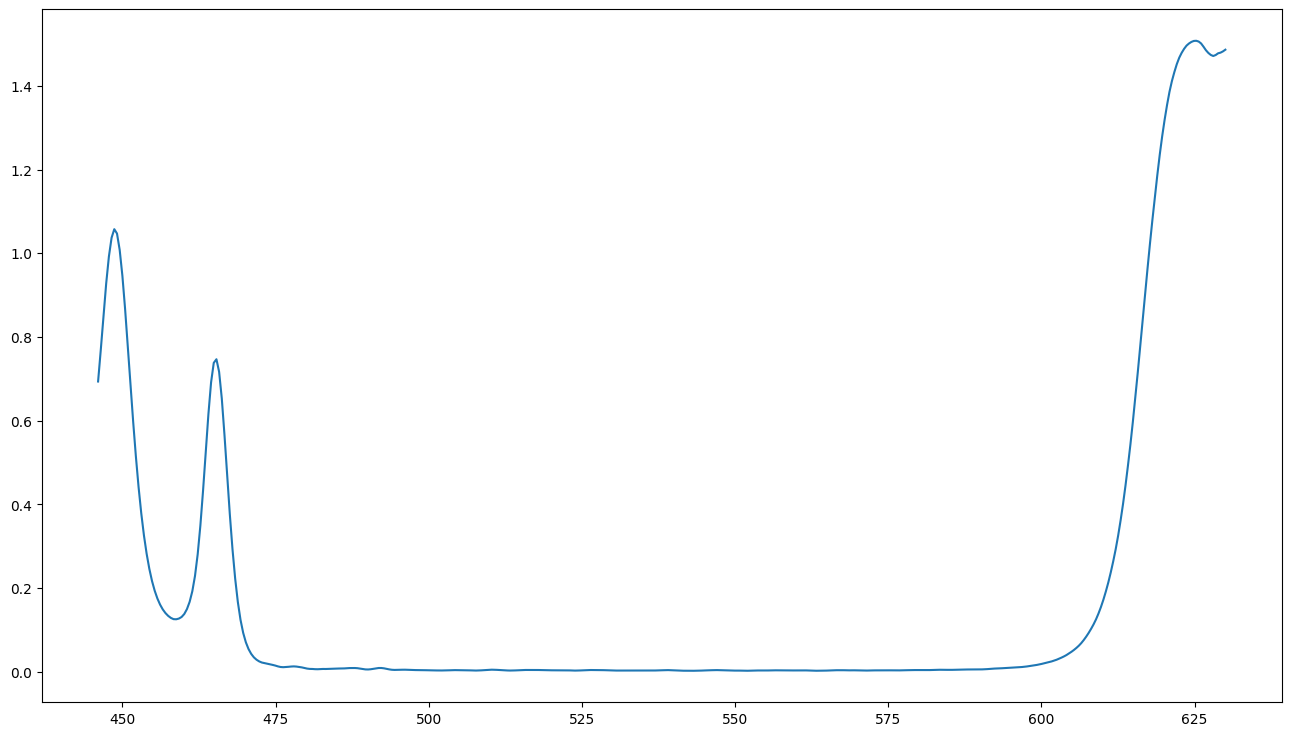

In [14]:
# ROSA-T
plt.figure(figsize=(16,9))
plt.plot(xx,rosaT)

plt.show()
plt.figure(figsize=(16,9))
TTrosa = (rosaT-darkT2)/(refTP2-darkT2)
plt.plot(xx[610:1050], np.abs(TTrosa)[610:1050])
print(xx[610:1050][np.argpartition(TTrosa[610:1050], -50)[-50:]])


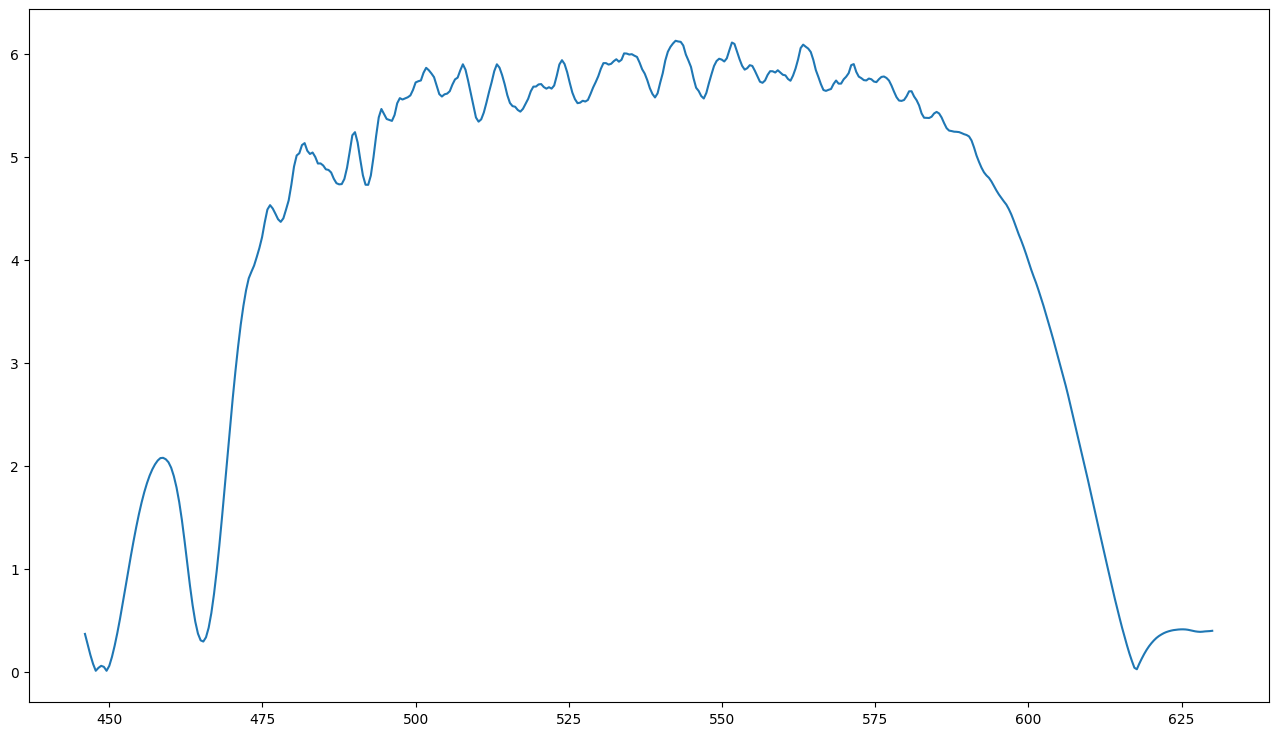

In [15]:
# ROSA-A
AArosa = np.log(1/np.abs(TTrosa))
plt.figure(figsize=(16,9))
plt.plot(xx[610:1050],np.abs(AArosa)[610:1050])

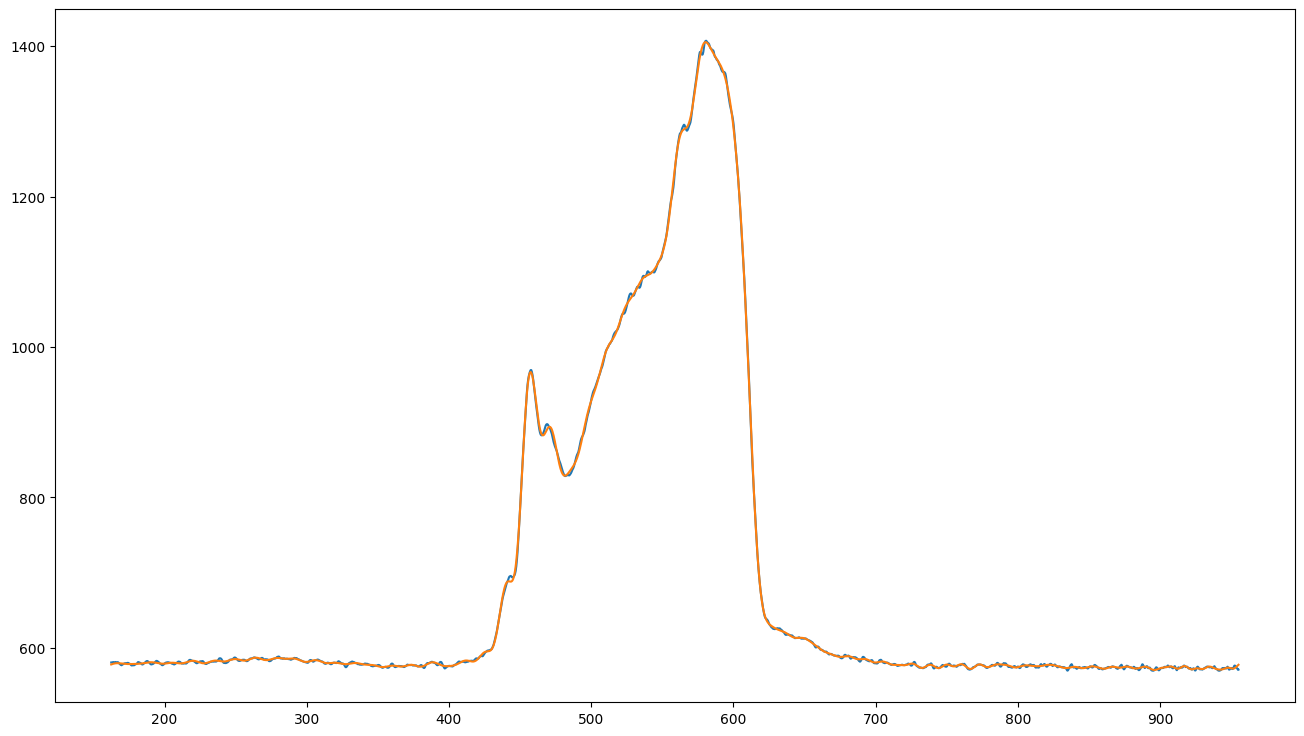

[455.282 459.23  456.16  455.721 458.791 456.599 457.037 457.476 457.915
 458.353]
[583.395 582.986 579.715 582.578 582.169 581.351 580.942 580.533 580.124
 581.76 ]


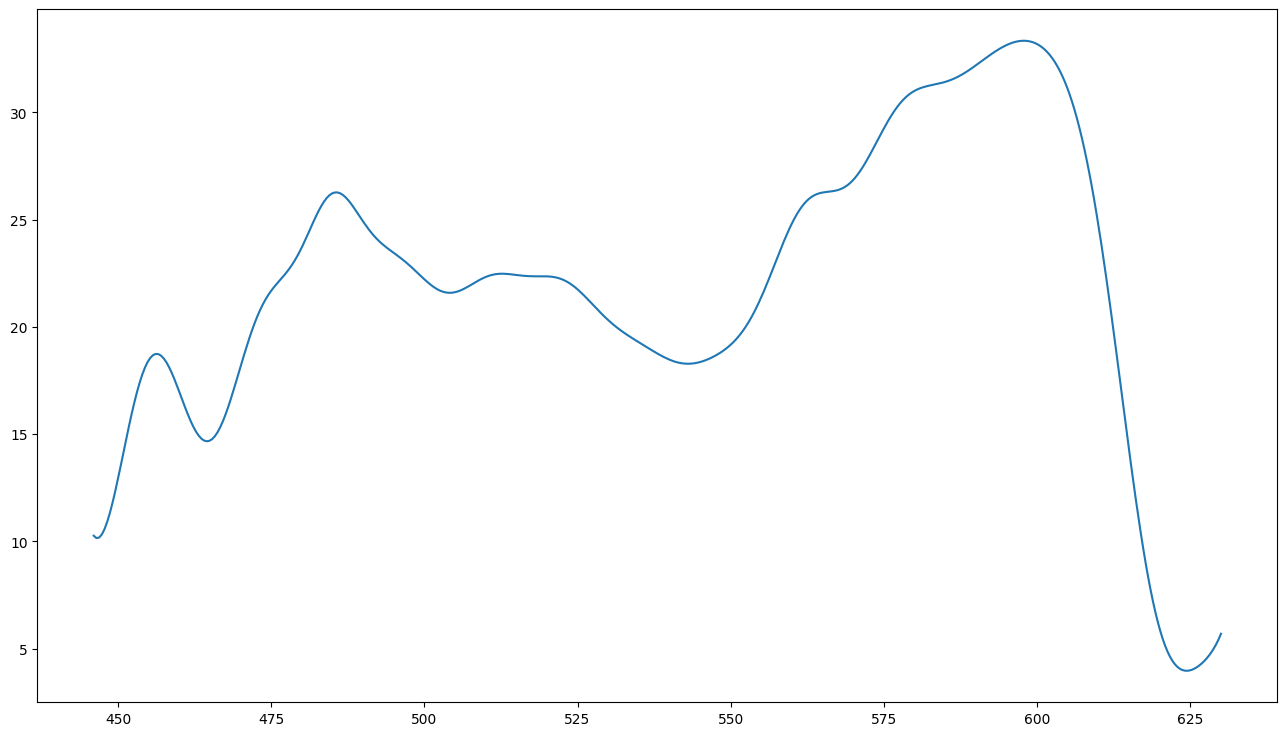

In [16]:
# ROSA-R
plt.figure(figsize=(16,9))
plt.plot(xx,rosaR)

ck = np.fft.rfft(rosaR)
ck[70:] *= 0
rosaR2 = np.fft.irfft(ck)
plt.plot(xx,rosaR2)

plt.show()
plt.figure(figsize=(16,9))
RRrosa = (rosaR2-darkR2)/(refRP2-darkR2)
plt.plot(xx[610:1050], np.abs(RRrosa)[610:1050])

print(xx[np.argpartition(rosaR[:rosaR.shape[0]//3], -10)[-10:]])
print(xx[np.argpartition(rosaR, -10)[-10:]])

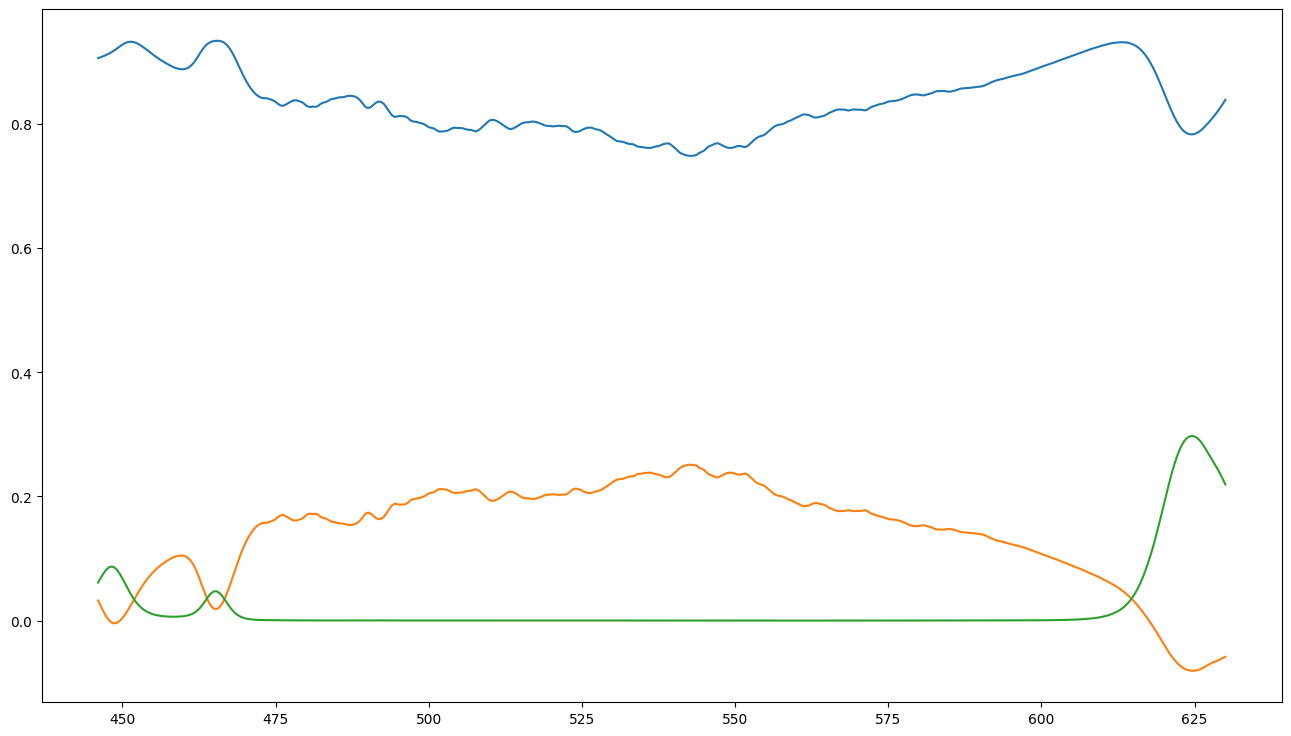

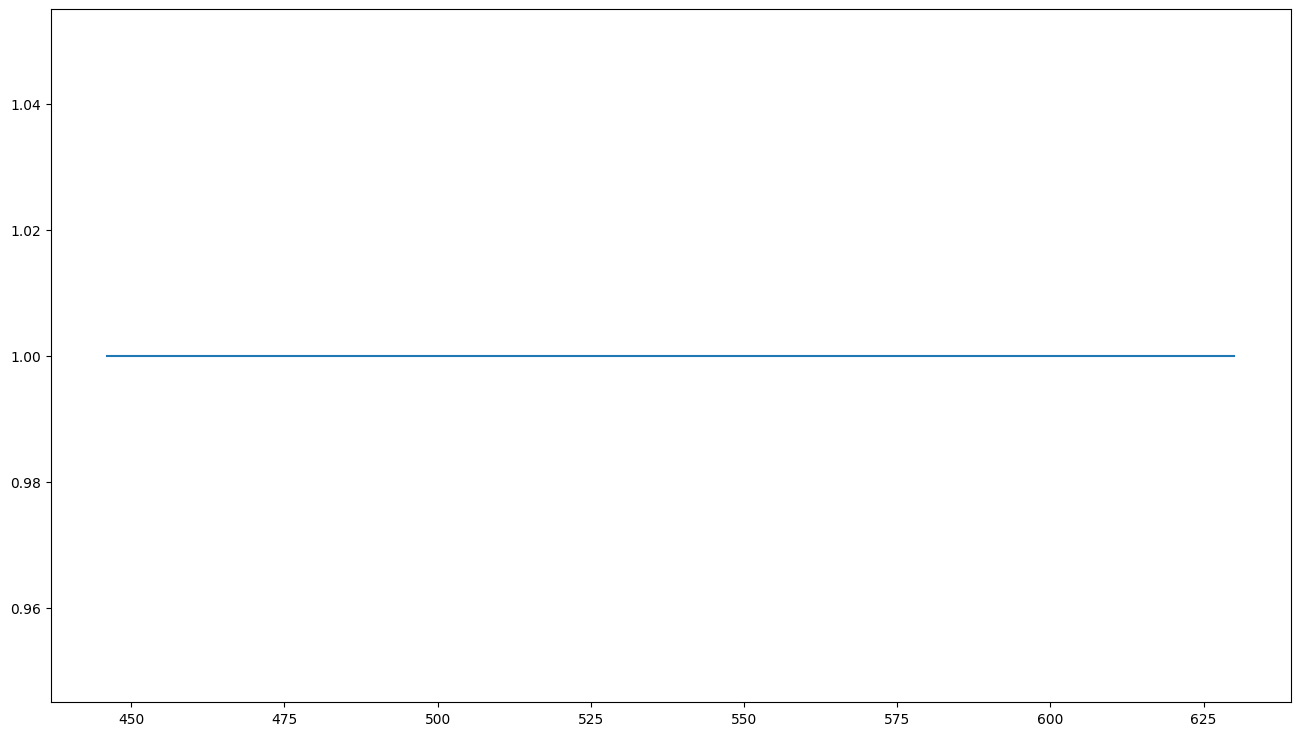

In [17]:
### ROSA FINAL

## Normalizar

TOTrosa = RRrosa + AArosa + TTrosa
RRrosa = RRrosa/TOTrosa
AArosa = AArosa/TOTrosa
TTrosa = TTrosa/TOTrosa

## Sobreposição

plt.figure(figsize=(16,9))
plt.plot(xx[610:1050], RRrosa[610:1050])
plt.plot(xx[610:1050], AArosa[610:1050])
plt.plot(xx[610:1050], TTrosa[610:1050])

plt.figure(figsize=(16,9))
plt.plot(xx[610:1050], (RRrosa + AArosa + TTrosa)[610:1050])

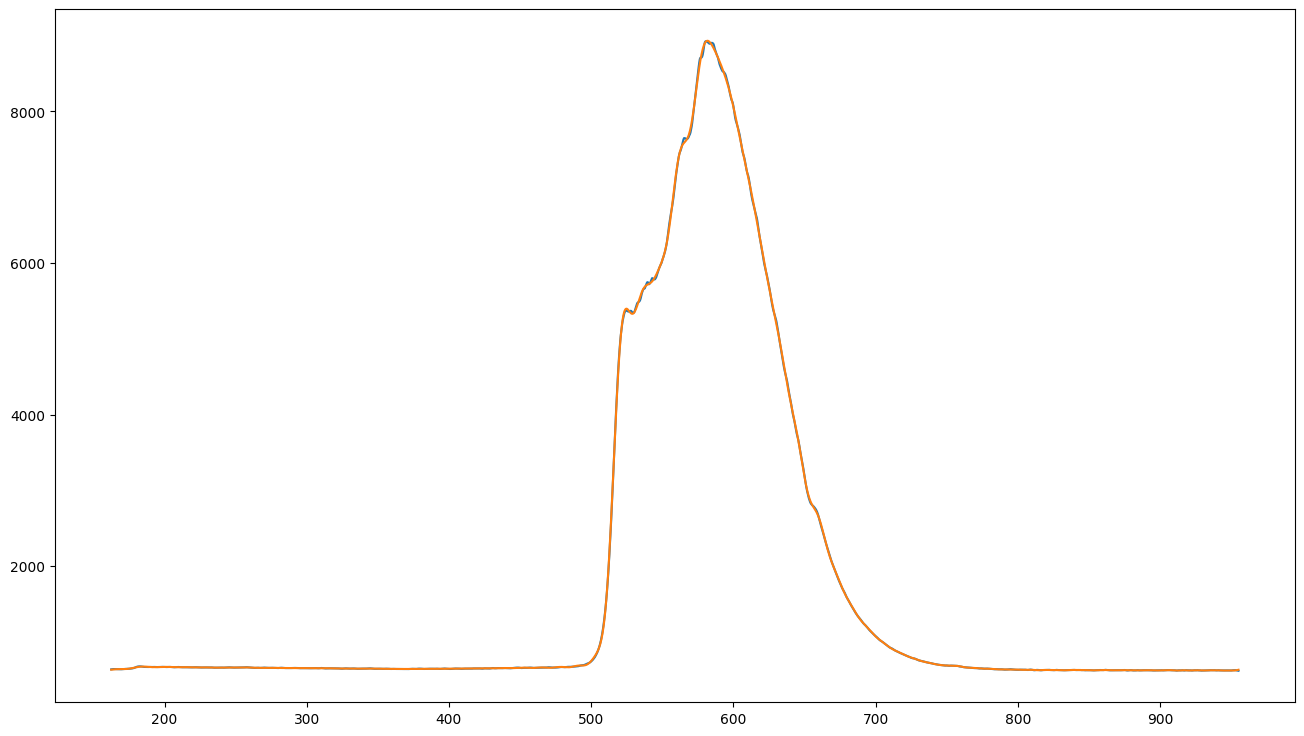

[212.143 745.453 209.747 212.622 182.332]


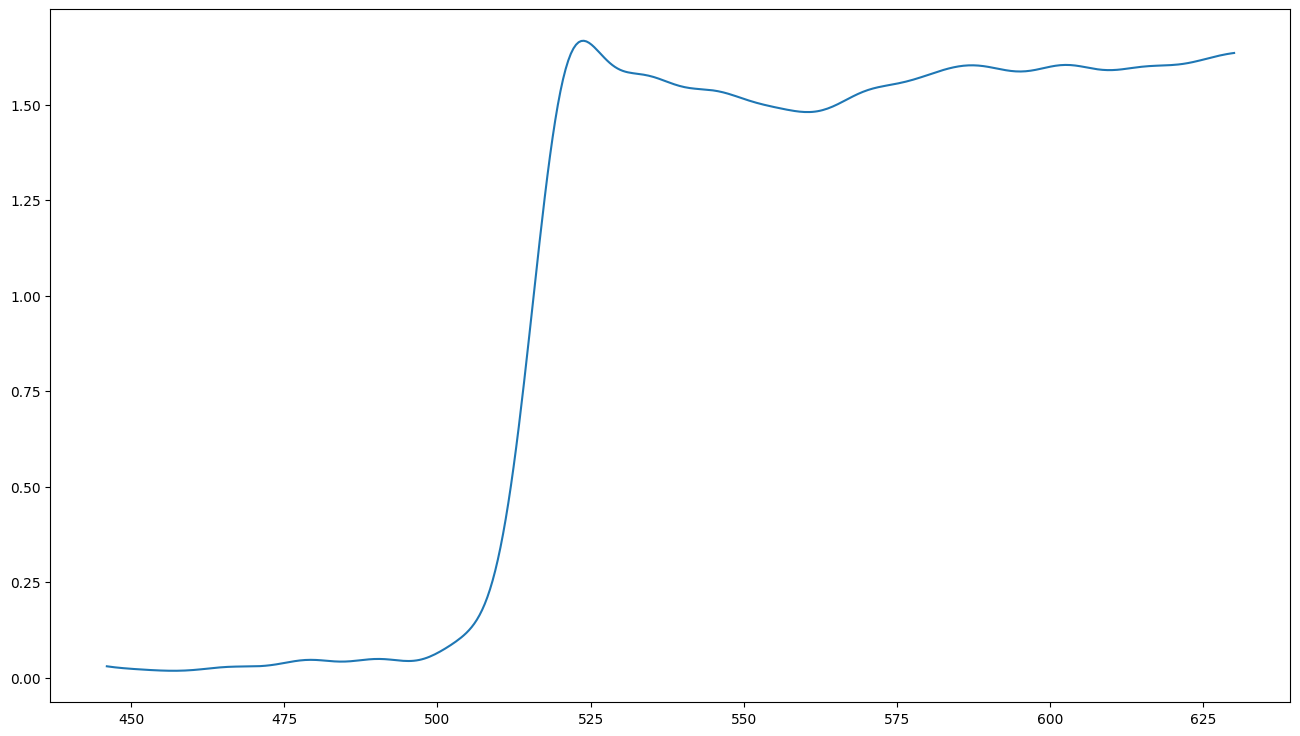

In [18]:
# AMARELO-T
plt.figure(figsize=(16,9))
plt.plot(xx,amareloT)

ck = np.fft.rfft(amareloT)
ck[70:] *= 0
amareloT2 = np.fft.irfft(ck)
plt.plot(xx,amareloT2)

plt.show()
plt.figure(figsize=(16,9))
TTamarelo = (amareloT2-darkT2)/(refTP2-darkT2)
plt.plot(xx[610:1050], np.abs(TTamarelo)[610:1050])

print(xx[np.argpartition(TTamarelo, -5)[-5:]])


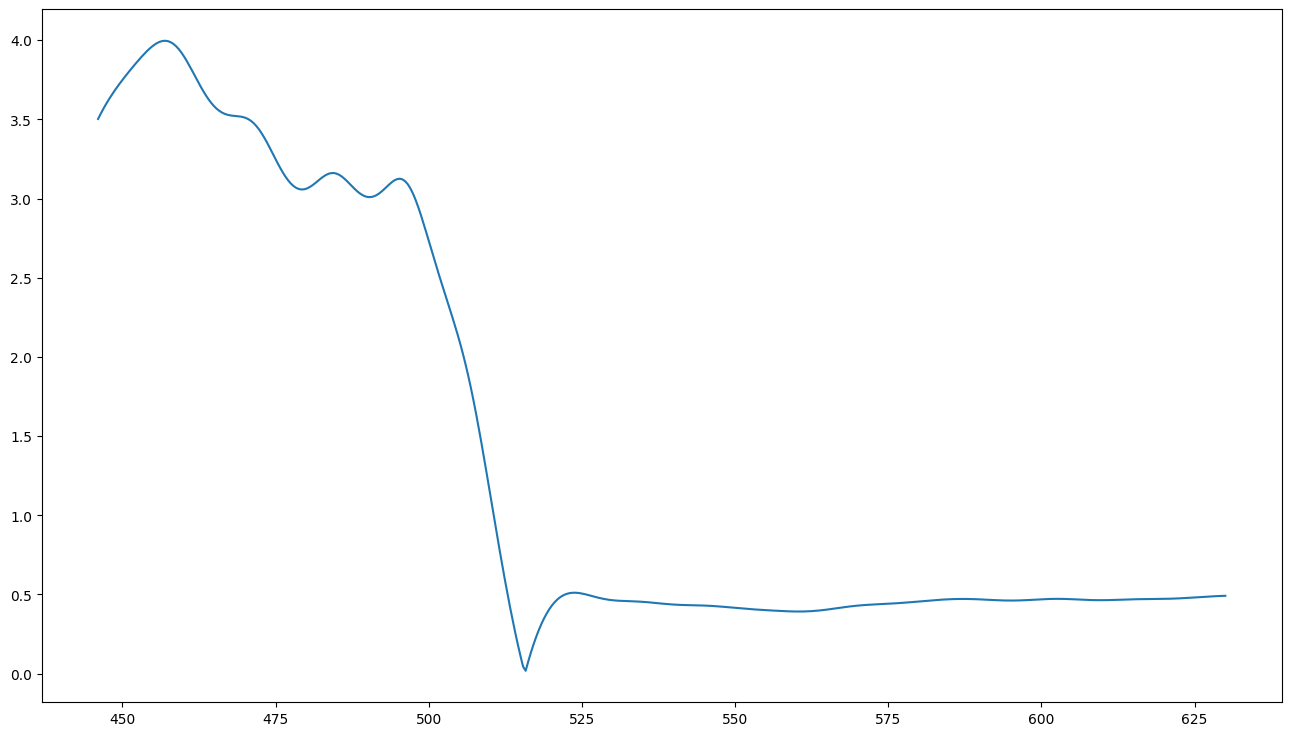

In [19]:
# AMARELO-A
AAamarelo = np.log(1/np.abs(TTamarelo))
plt.figure(figsize=(16,9))
plt.plot(xx[610:1050],np.abs(AAamarelo)[610:1050])

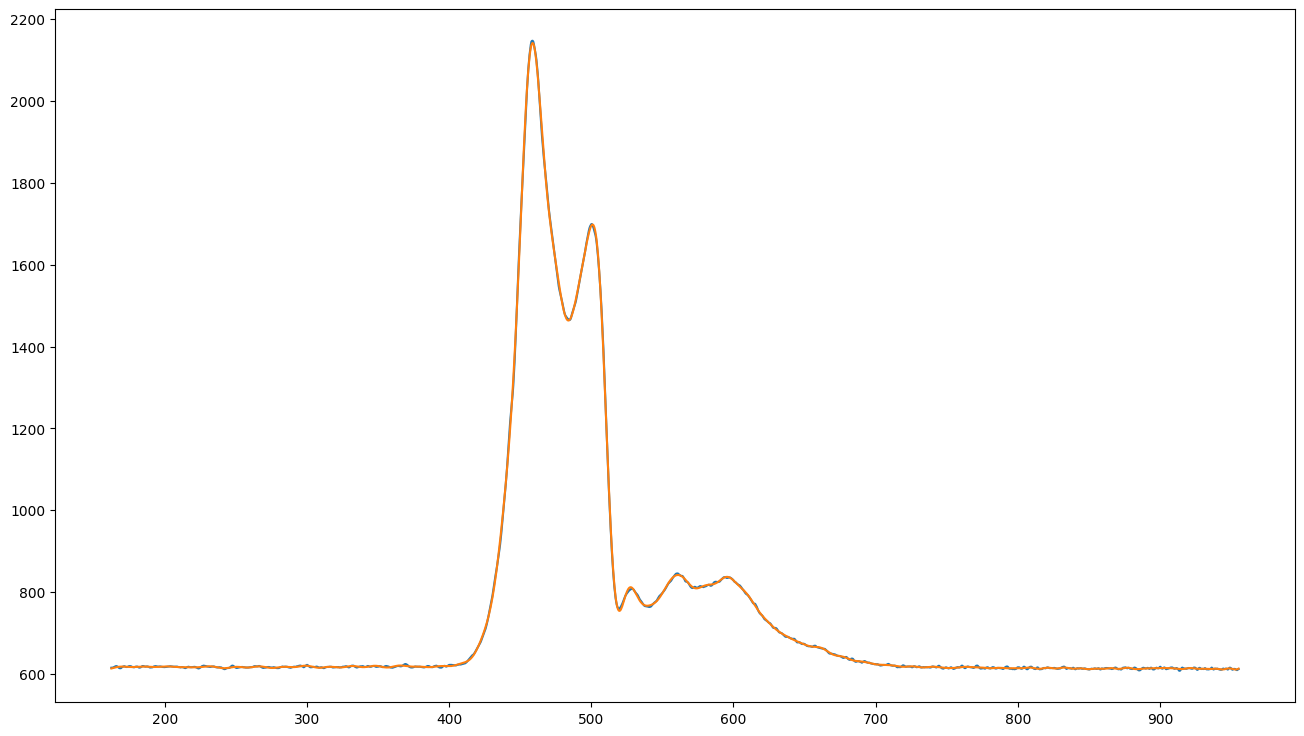

[635.53  439.859 439.416 438.974 635.923]


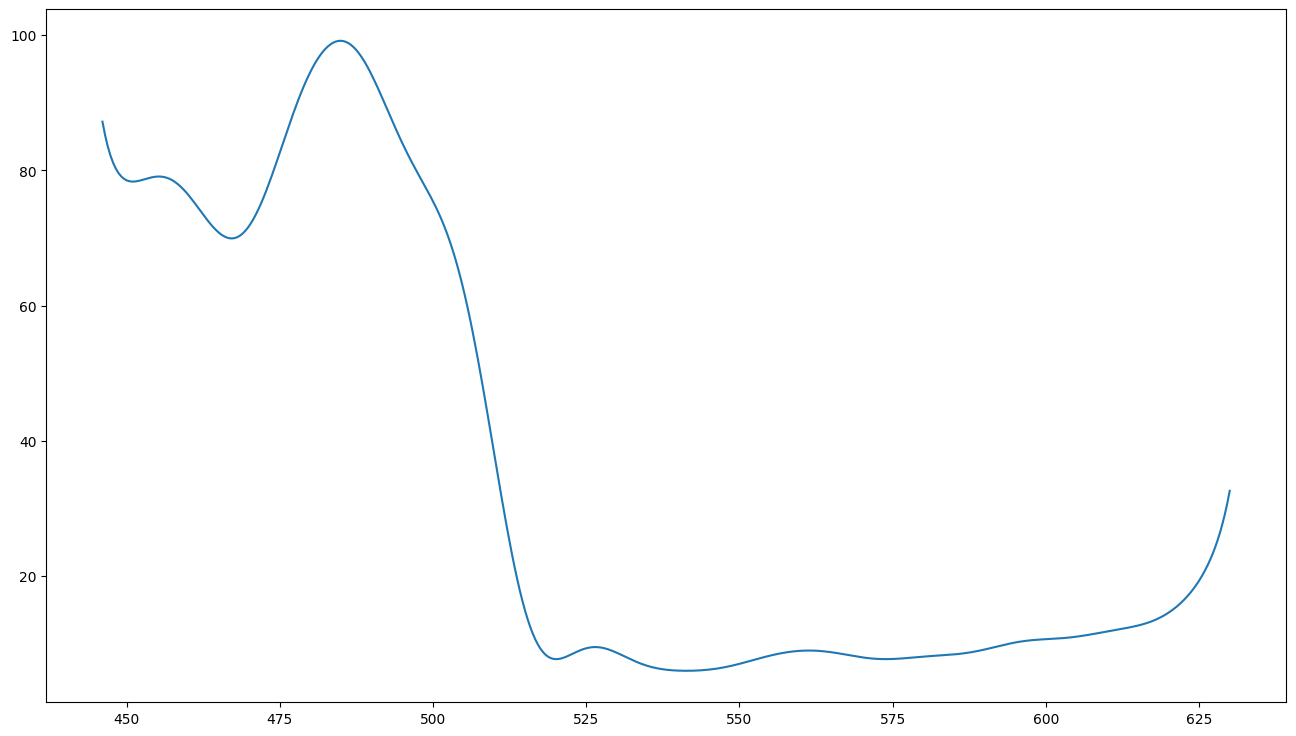

In [20]:
# AMARELO-R
plt.figure(figsize=(16,9))
plt.plot(xx,amareloR)

ck = np.fft.rfft(amareloR)
ck[60:] *= 0
amareloR2 = np.fft.irfft(ck)
plt.plot(xx,amareloR2)

plt.show()
plt.figure(figsize=(16,9))
RRamarelo = (amareloR2-darkR2)/(refRP2-darkR2)
plt.plot(xx[610:1050], np.abs(RRamarelo)[610:1050])

print(xx[np.argpartition(RRamarelo, -5)[-5:]])


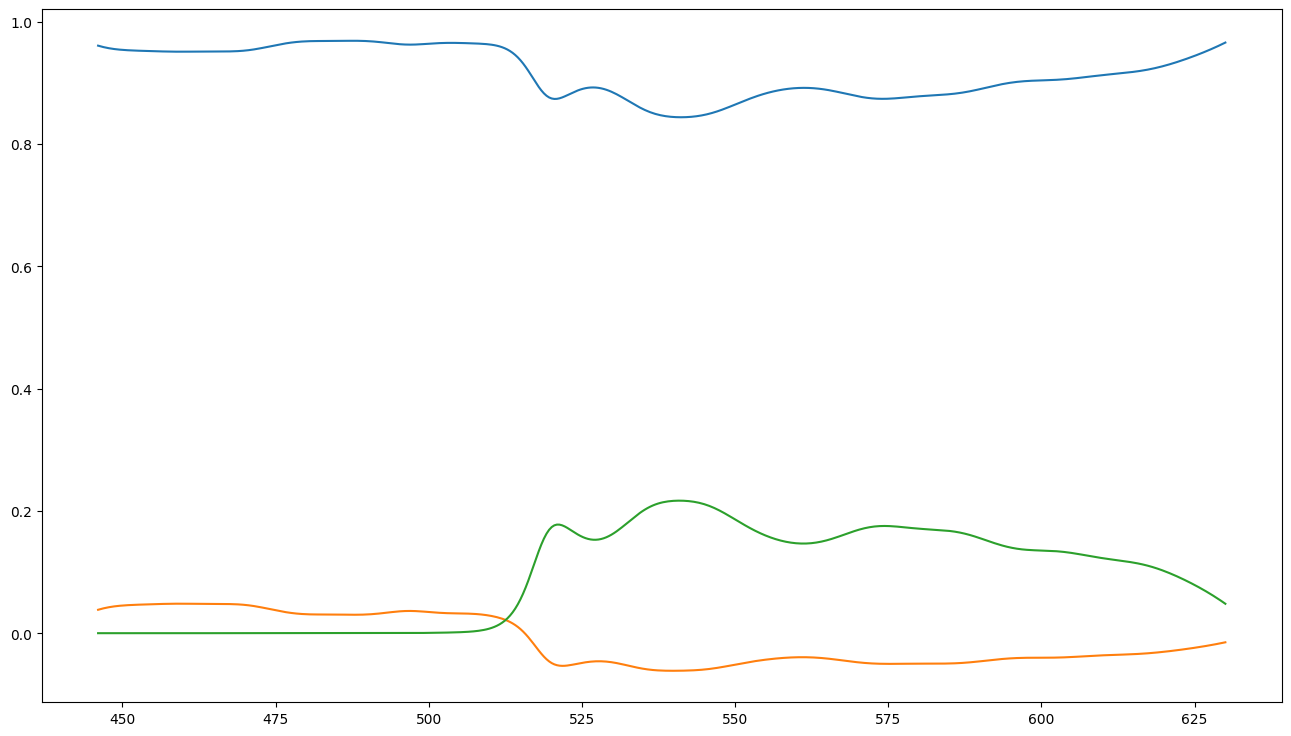

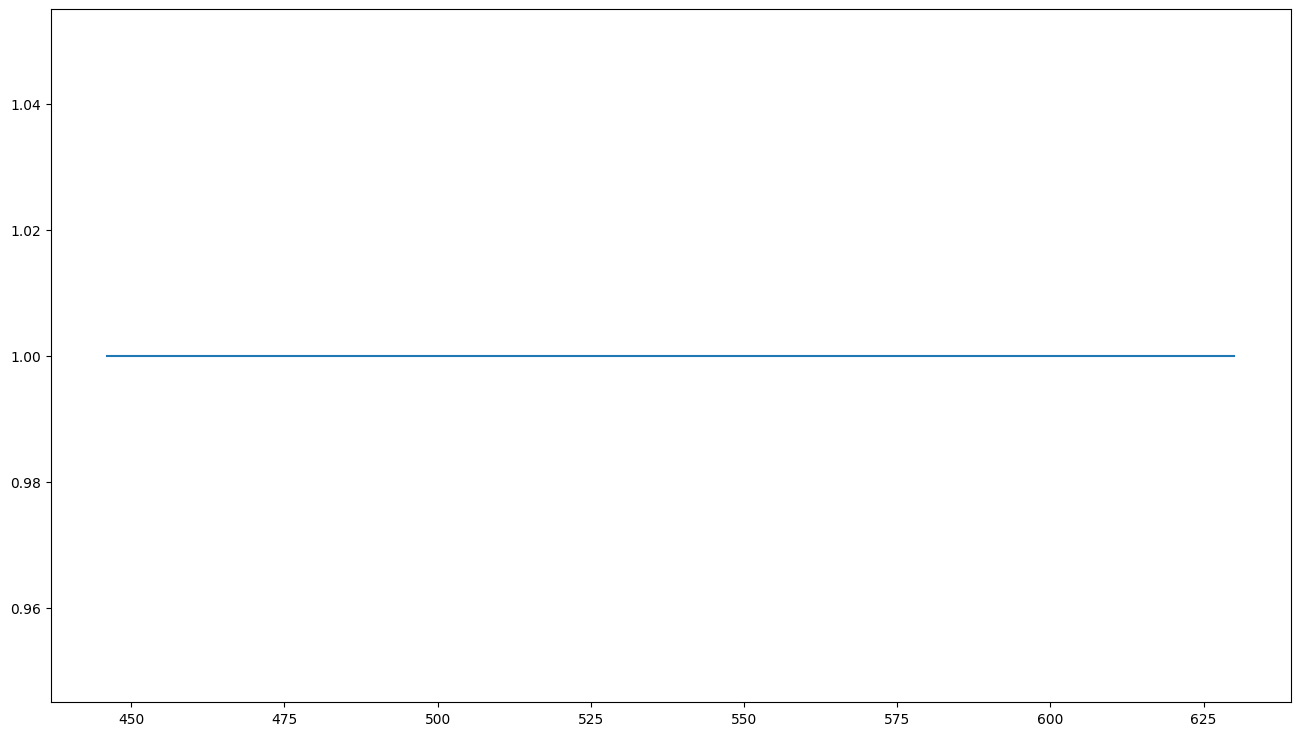

In [21]:
### AMARELO FINAL

## Normalizar

TOTamarelo = RRamarelo + AAamarelo + TTamarelo
RRamarelo = RRamarelo/TOTamarelo
AAamarelo = AAamarelo/TOTamarelo
TTamarelo = TTamarelo/TOTamarelo

## Sobreposição

plt.figure(figsize=(16,9))
plt.plot(xx[610:1050], RRamarelo[610:1050])
plt.plot(xx[610:1050], AAamarelo[610:1050])
plt.plot(xx[610:1050], TTamarelo[610:1050])

plt.figure(figsize=(16,9))
plt.plot(xx[610:1050], (RRamarelo + AAamarelo + TTamarelo)[610:1050])

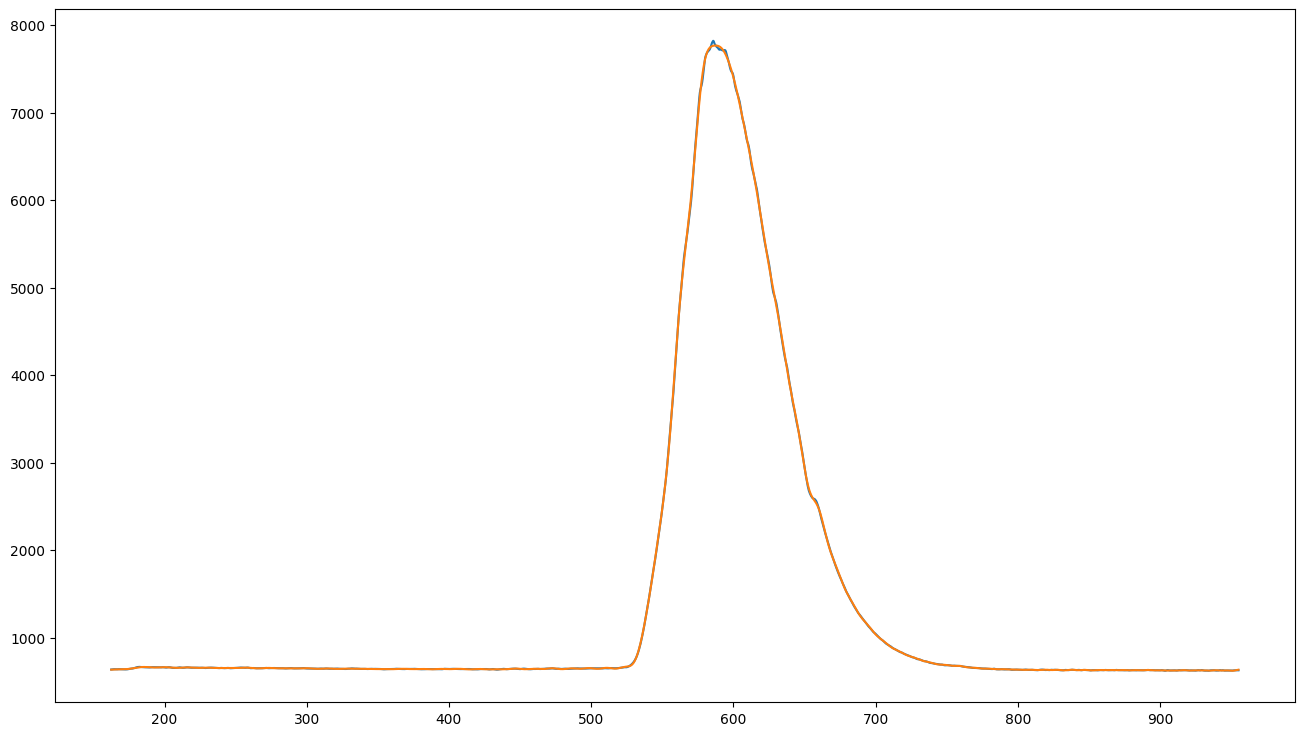

[212.143 745.453 209.747 212.622 182.332]


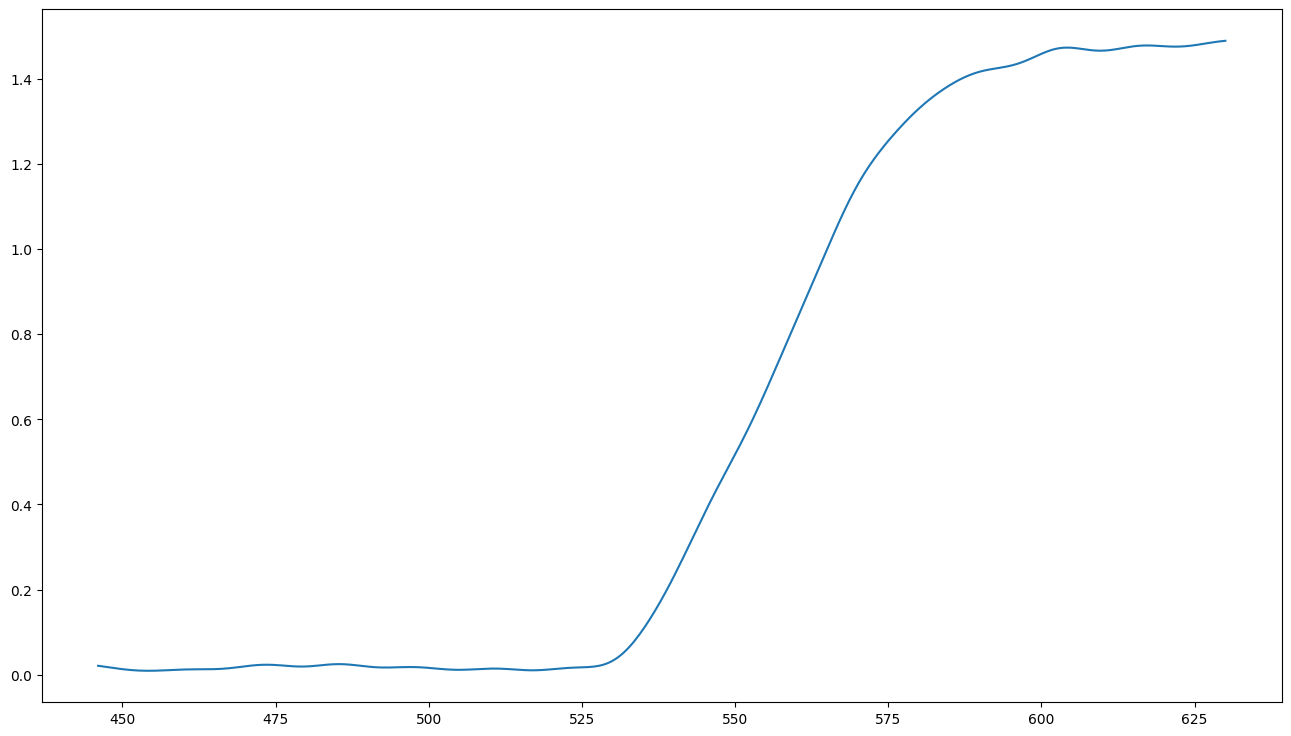

In [22]:
# LARANJA-T
plt.figure(figsize=(16,9))
plt.plot(xx,laranjaT)

ck = np.fft.rfft(laranjaT)
ck[70:] *= 0
laranjaT2 = np.fft.irfft(ck)
plt.plot(xx,laranjaT2)

plt.show()
plt.figure(figsize=(16,9))
TTlaranja= (laranjaT2-darkT2)/(refTP2-darkT2)
plt.plot(xx[610:1050], np.abs(TTlaranja)[610:1050])

print(xx[np.argpartition(TTlaranja, -5)[-5:]])


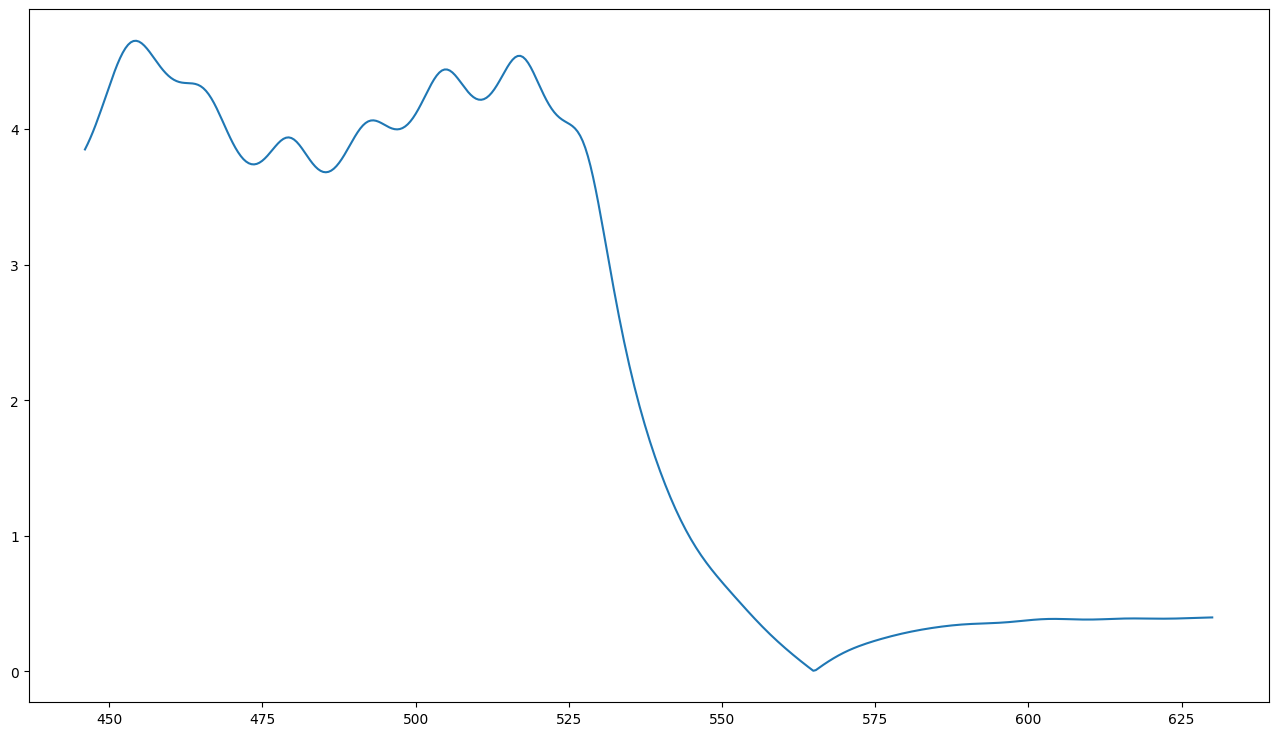

In [23]:
# LARANJA-A
AAlaranja = np.log(1/np.abs(TTlaranja))
plt.figure(figsize=(16,9))
plt.plot(xx[610:1050],np.abs(AAlaranja)[610:1050])

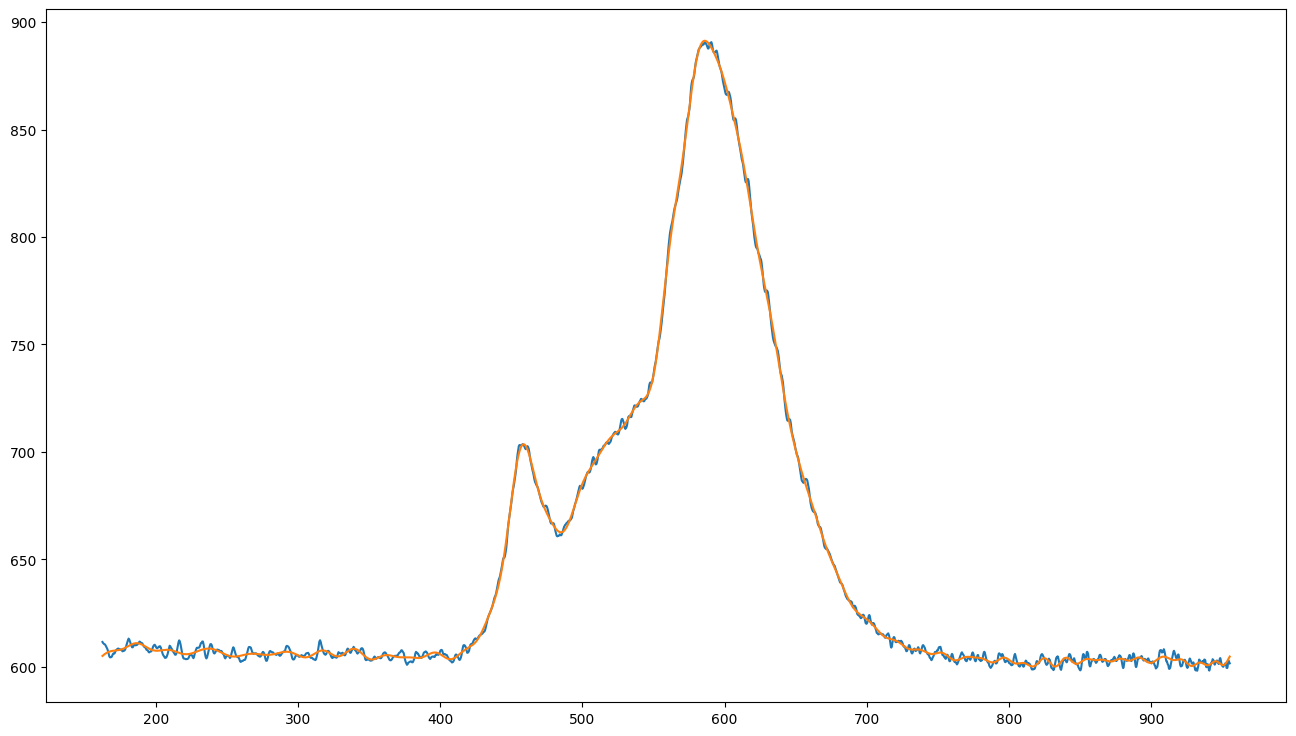

[634.349 634.743 635.136 635.53  635.923]


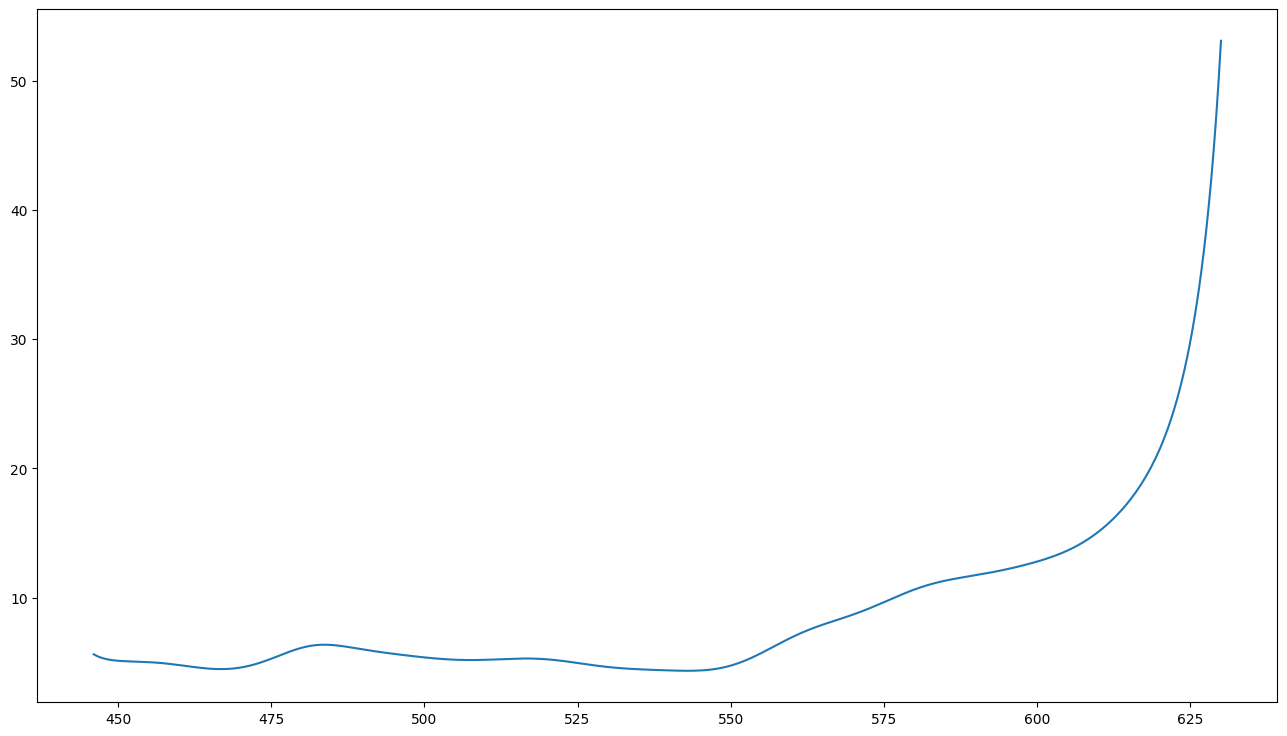

In [24]:
# LARANJA-R
plt.figure(figsize=(16,9))
plt.plot(xx,laranjaR)

ck = np.fft.rfft(laranjaR)
ck[50:] *= 0
laranjaR2 = np.fft.irfft(ck)
plt.plot(xx,laranjaR2)

plt.show()
plt.figure(figsize=(16,9))
RRlaranja = (laranjaR2-darkR2)/(refRP2-darkR2)
plt.plot(xx[610:1050], abs(RRlaranja)[610:1050])

print(xx[np.argpartition(RRlaranja, -5)[-5:]])


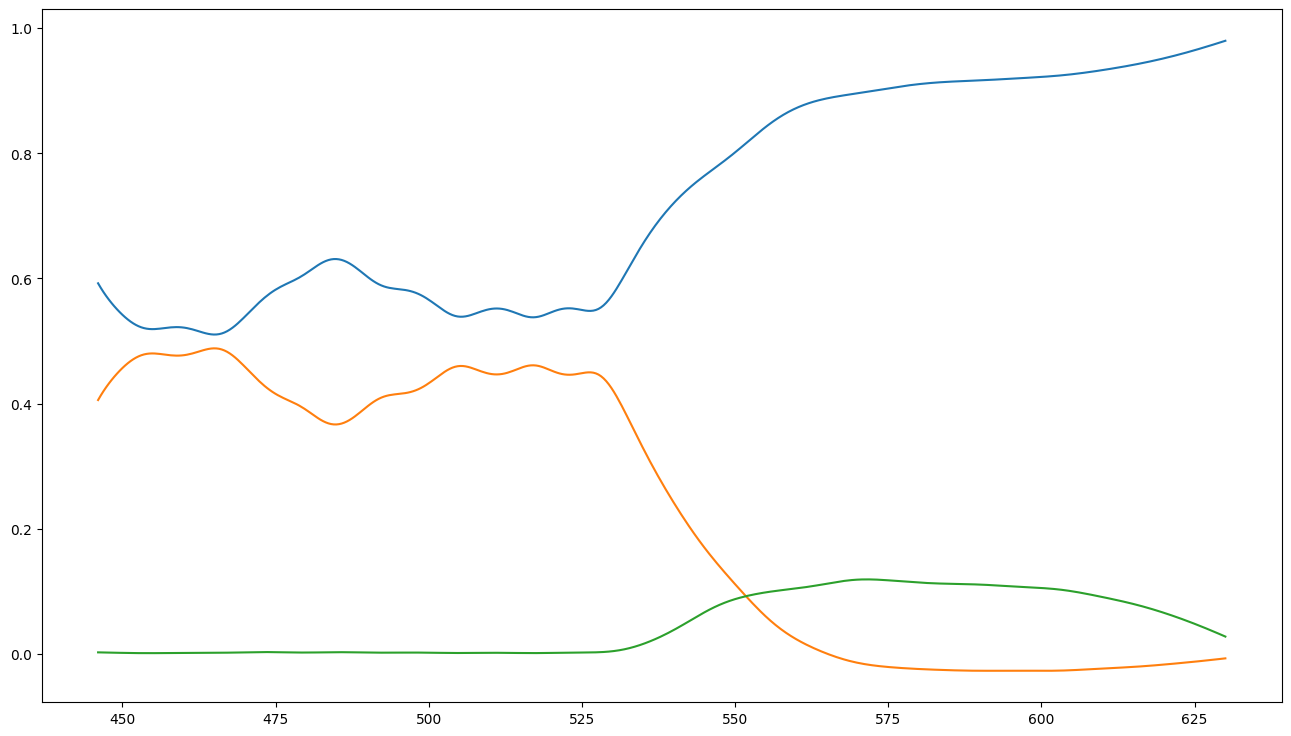

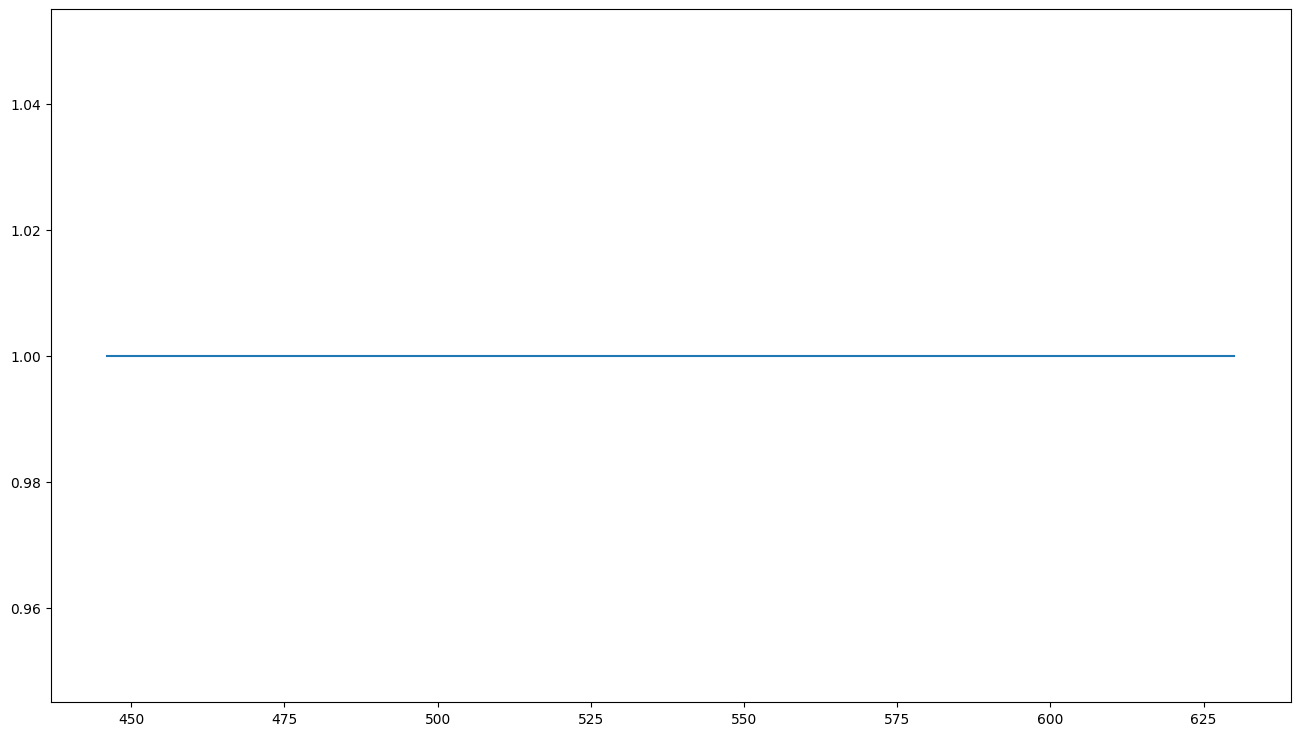

In [25]:
### LARANJA FINAL

## Normalizar

TOTlaranja = RRlaranja + AAlaranja + TTlaranja
RRlaranja = RRlaranja/TOTlaranja
AAlaranja = AAlaranja/TOTlaranja
TTlaranja = TTlaranja/TOTlaranja

## Sobreposição

plt.figure(figsize=(16,9))
plt.plot(xx[610:1050], RRlaranja[610:1050])
plt.plot(xx[610:1050], AAlaranja[610:1050])
plt.plot(xx[610:1050], TTlaranja[610:1050])

plt.figure(figsize=(16,9))
plt.plot(xx[610:1050], (TTlaranja+AAlaranja+RRlaranja)[610:1050])